<a href="https://colab.research.google.com/github/lucaschini/imputando-dados-penguins/blob/main/MD_Trabalho2_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports, podem alterar conforme necessário

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

#### Lendo base de dados e removendo valores aleatoriamente **executar SEM ALTERAR**

In [ ]:
#Carregando base de dados
penguins = sns.load_dataset('penguins')

np.random.seed(42)  #Definindo seed do random para replicabilidade

#Removendo valores
removidos = set()
porcentagem = 0.30 #Porcentagem (0~1) das células a serem removidas
qtdCelulas = len(penguins)*(len(penguins.columns)) #Quantidade de células na base de dados, ignorando a última coluna

for i in range(int(np.ceil(porcentagem*qtdCelulas))):
  linha = np.random.randint(0, len(penguins))
  coluna = np.random.randint(0, len(penguins.columns))
  while (linha, coluna) in removidos:
    linha = np.random.randint(0, len(penguins))
    coluna = np.random.randint(0, len(penguins.columns))

  penguins.iloc[linha, coluna] = np.nan
  removidos.add((linha,coluna))

penguins.info()
print("\n\nForam removidas ",str(len(removidos)), "células das ",str(qtdCelulas))
del removidos
del qtdCelulas
del porcentagem

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            232 non-null    object 
 1   island             241 non-null    object 
 2   bill_length_mm     233 non-null    float64
 3   bill_depth_mm      244 non-null    float64
 4   flipper_length_mm  247 non-null    float64
 5   body_mass_g        240 non-null    float64
 6   sex                235 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


Foram removidas  723 células das  2408


# **Podem modificar daqui para baixo para fazer a imputação de valores**

In [ ]:
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [ ]:
penguins.to_csv("penguins_na.csv", index=False, header=True,  na_rep='?')

In [ ]:
penguins

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen             NaN           18.7                NaN   
1       NaN        NaN            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie        NaN             NaN            NaN                NaN   
4    Adelie        NaN             NaN           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo        NaN            46.8           14.3              215.0   
341     NaN     Biscoe             NaN            NaN                NaN   
342  Gentoo     Biscoe            45.2           14.8                NaN   
343     NaN     Biscoe             NaN            NaN              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1            NaN  Female  
2         3250.0  Female  
3            NaN     NaN  
4         3450.0     NaN  
..           ...     ...  
339          NaN     NaN  
340          NaN     NaN  
341       5750.0     NaN  
342       5200.0  Female  
343       5400.0    Male  

[344 rows x 7 columns]

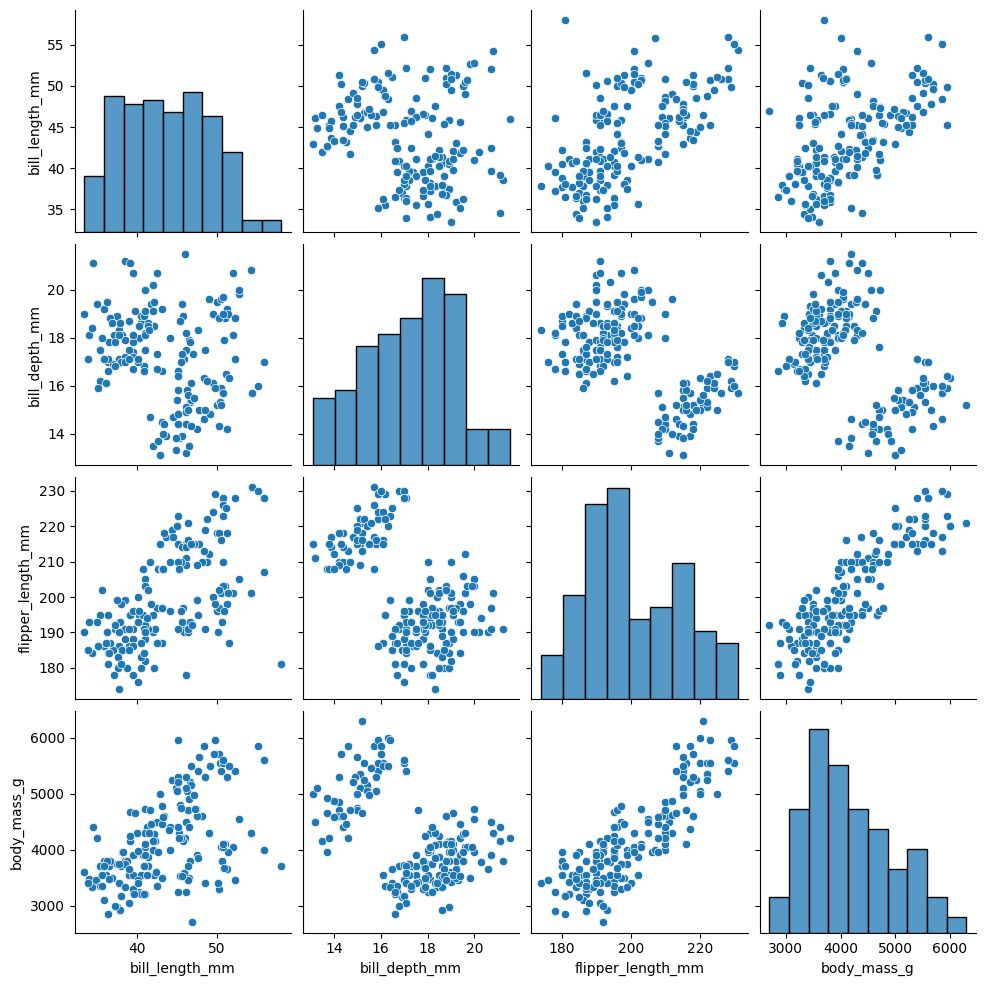

In [ ]:
sns.pairplot(penguins)

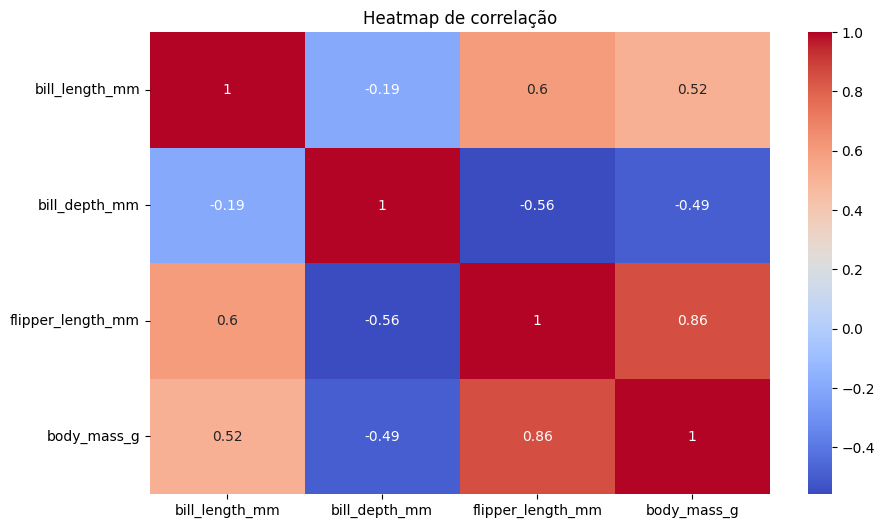

In [ ]:
cols_for_corr = [
    "bill_length_mm",
    "bill_depth_mm",
    "flipper_length_mm",
    "body_mass_g",
]

corr_matrix = penguins[cols_for_corr].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Heatmap de correlação")
plt.show()

# Testando imputar dados categóricos com Regras Óbvias

In [ ]:
penguinsObv = penguins.copy()

Os dados imputados nesta parte são observados a partir dos pairplots da base original, filtrando por 'island', 'species' e 'sex'

## Sex


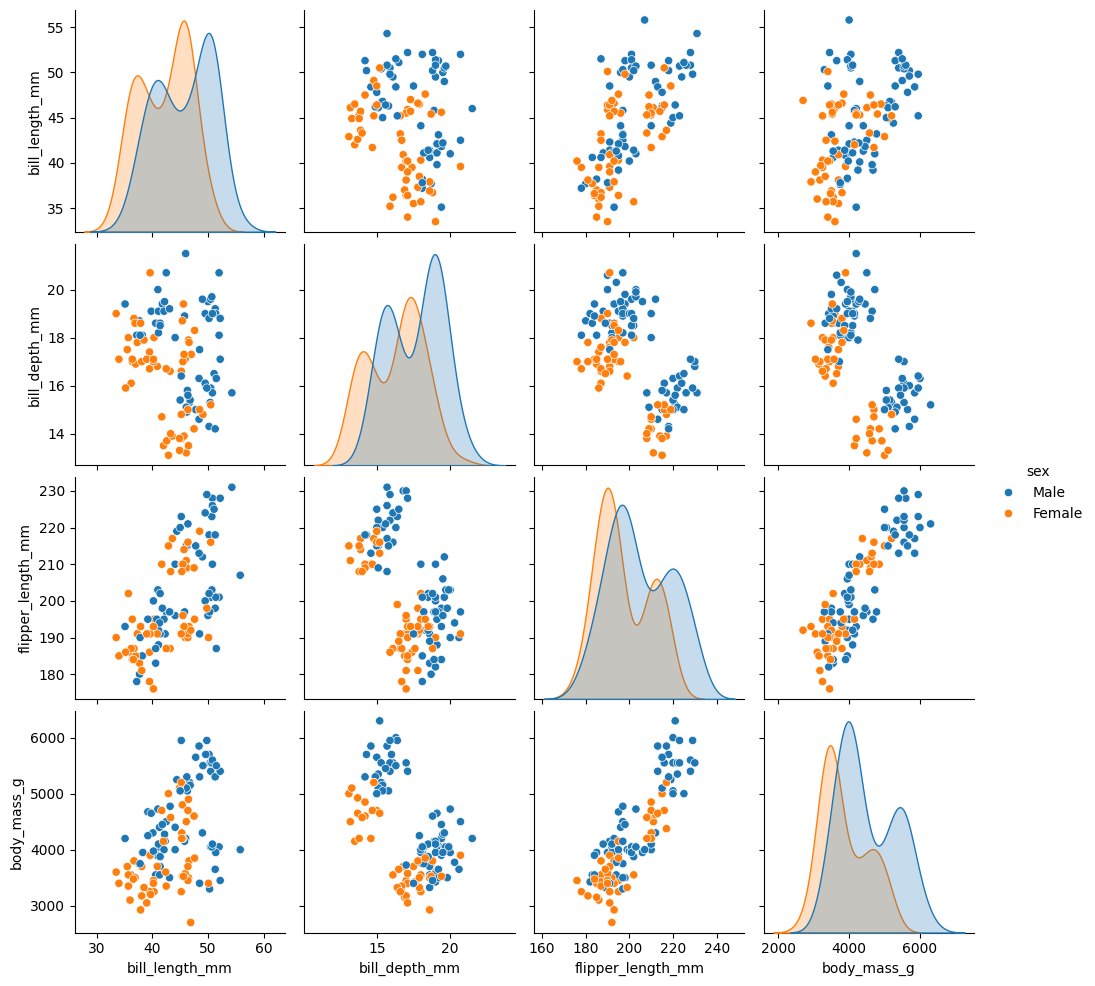

In [ ]:
sns.pairplot(penguins, hue='sex')

In [ ]:
#body mass g
print("Male: ",penguinsObv.body_mass_g[penguins.sex == 'Male'].describe(),'\n')
print("Female: ",penguinsObv.body_mass_g[penguins.sex == 'Female'].describe())

Male:  count      96.000000
mean     4518.229167
std       795.244742
min      3300.000000
25%      3950.000000
50%      4225.000000
75%      5300.000000
max      6300.000000
Name: body_mass_g, dtype: float64 

Female:  count      67.000000
mean     3869.776119
std       649.905840
min      2700.000000
25%      3400.000000
50%      3650.000000
75%      4437.500000
max      5200.000000
Name: body_mass_g, dtype: float64


In [ ]:
penguinsObv.loc[penguinsObv.body_mass_g > 5200, 'sex'] = 'Male'

In [ ]:
penguinsObv.loc[penguinsObv.body_mass_g < 3300, 'sex'] = 'Female'

In [ ]:
#flipper length mm
penguinsObv.flipper_length_mm[penguins.sex == 'Male'].describe()

count     91.000000
mean     204.945055
std       14.248869
min      178.000000
25%      194.500000
50%      201.000000
75%      218.500000
max      231.000000
Name: flipper_length_mm, dtype: float64

In [ ]:
penguinsObv.flipper_length_mm[penguins.sex == 'Female'].describe()

count     73.000000
mean     197.301370
std       11.950924
min      176.000000
25%      187.000000
50%      193.000000
75%      210.000000
max      219.000000
Name: flipper_length_mm, dtype: float64

In [ ]:
penguinsObv.loc[penguinsObv.flipper_length_mm > 219, 'sex'] = 'Male'

In [ ]:
penguinsObv.loc[penguinsObv.flipper_length_mm < 178, 'sex'] = 'Female'

In [ ]:
#bill depth mm
penguinsObv.bill_depth_mm[penguins.sex == 'Male'].describe()

count    91.000000
mean     17.648352
std       1.839889
min      14.200000
25%      15.900000
50%      18.100000
75%      19.100000
max      21.500000
Name: bill_depth_mm, dtype: float64

In [ ]:
penguinsObv.bill_depth_mm[penguins.sex == 'Female'].describe()

count    73.000000
mean     16.297260
std       1.875868
min      13.100000
25%      14.600000
50%      16.900000
75%      17.800000
max      20.700000
Name: bill_depth_mm, dtype: float64

In [ ]:
penguinsObv.loc[penguinsObv.bill_depth_mm > 20.7, 'sex'] = 'Male'

In [ ]:
penguinsObv.loc[penguinsObv.bill_depth_mm < 14.2, 'sex'] = 'Female'

In [ ]:
#bill length mm
penguinsObv.bill_length_mm[penguins.sex == 'Male'].describe()

count    82.000000
mean     45.713415
std       5.089490
min      35.100000
25%      41.150000
50%      46.250000
75%      50.375000
max      55.800000
Name: bill_length_mm, dtype: float64

In [ ]:
penguinsObv.bill_length_mm[penguins.sex == 'Female'].describe()

count    78.000000
mean     42.175641
std       4.589859
min      33.500000
25%      37.900000
50%      43.050000
75%      45.875000
max      50.500000
Name: bill_length_mm, dtype: float64

In [ ]:
penguinsObv.loc[penguinsObv.bill_length_mm > 50.5]

species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
154  Chinstrap   Dream            51.3           19.2                NaN   
156        NaN   Dream            52.7           19.8                NaN   
161  Chinstrap     NaN            51.3            NaN              198.0   
165        NaN   Dream            52.0           18.1              201.0   
169  Chinstrap     NaN            58.0            NaN              181.0   
175  Chinstrap     NaN            50.6            NaN              193.0   
181        NaN   Dream            52.8           20.0              205.0   
183        NaN   Dream            54.2           20.8              201.0   
185  Chinstrap   Dream            51.0           18.8              203.0   
189        NaN     NaN            52.0           20.7                NaN   
196  Chinstrap   Dream            50.9           17.9              196.0   
200  Chinstrap     NaN            51.5            NaN              187.0   
203  Chinstrap     NaN            51.4           19.0              201.0   
205  Chinstrap   Dream            50.7           19.7              203.0   
207  Chinstrap   Dream            52.2           18.8                NaN   
215  Chinstrap   Dream            55.8            NaN              207.0   
218  Chinstrap     NaN            50.8           19.0              210.0   
283     Gentoo  Biscoe            54.3           15.7              231.0   
289     Gentoo  Biscoe            50.7            NaN              223.0   
305        NaN     NaN            50.8            NaN              228.0   
307        NaN  Biscoe            51.3           14.2              218.0   
311        NaN  Biscoe            52.2           17.1              228.0   
315     Gentoo     NaN            50.8           15.7              226.0   
319        NaN     NaN            51.1           16.5              225.0   
321     Gentoo     NaN            55.9           17.0              228.0   
333     Gentoo  Biscoe            51.5           16.3                NaN   
335     Gentoo  Biscoe            55.1           16.0              230.0   

     body_mass_g   sex  
154       3650.0  Male  
156          NaN   NaN  
161          NaN  Male  
165       4050.0  Male  
169       3700.0   NaN  
175       3800.0   NaN  
181       4550.0   NaN  
183       4300.0  Male  
185       4100.0   NaN  
189          NaN  Male  
196       3675.0   NaN  
200          NaN  Male  
203       3950.0  Male  
205       4050.0  Male  
207       3450.0  Male  
215       4000.0  Male  
218       4100.0  Male  
283          NaN  Male  
289       5550.0  Male  
305       5600.0  Male  
307       5300.0  Male  
311       5400.0  Male  
315          NaN  Male  
319          NaN  Male  
321       5600.0  Male  
333       5500.0  Male  
335       5850.0  Male

In [ ]:
penguinsObv.loc[penguinsObv.bill_length_mm > 50.5, 'sex'] = 'Male'

In [ ]:
penguinsObv.loc[penguinsObv.bill_length_mm < 35.1, 'sex'] = 'Female'

## Island

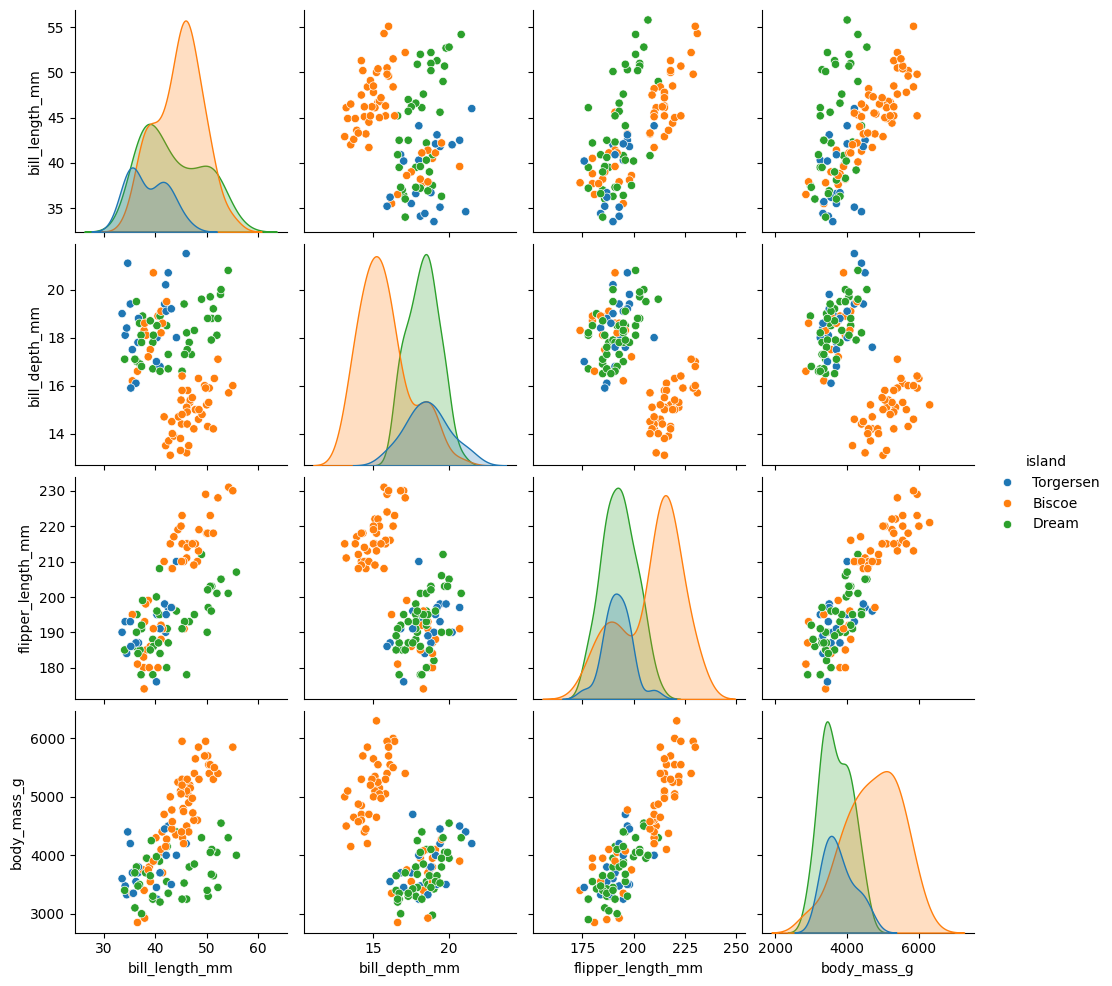

In [ ]:
sns.pairplot(penguins, hue='island')

In [ ]:
print("Torgersen: ",penguinsObv.body_mass_g[penguins.island == 'Torgersen'].describe(),'\n')
print("Biscoe: ",penguinsObv.body_mass_g[penguins.island == 'Biscoe'].describe(),'\n')
print("Dream: ",penguinsObv.body_mass_g[penguins.island == 'Dream'].describe())

Torgersen:  count      25.00000
mean     3781.00000
std       425.38463
min      3200.00000
25%      3475.00000
50%      3700.00000
75%      4000.00000
max      4700.00000
Name: body_mass_g, dtype: float64 

Biscoe:  count      84.000000
mean     4721.130952
std       777.066755
min      2850.000000
25%      4187.500000
50%      4762.500000
75%      5300.000000
max      6300.000000
Name: body_mass_g, dtype: float64 

Dream:  count      59.000000
mean     3691.949153
std       418.495887
min      2900.000000
25%      3375.000000
50%      3650.000000
75%      4025.000000
max      4550.000000
Name: body_mass_g, dtype: float64


In [ ]:
penguinsObv.loc[penguinsObv.body_mass_g > 4700]

species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
101  Adelie     NaN            41.0           20.0              203.0   
109  Adelie  Biscoe            43.2            NaN              197.0   
224     NaN  Biscoe            47.6            NaN              215.0   
226  Gentoo  Biscoe            45.4            NaN                NaN   
227  Gentoo  Biscoe            46.7           15.3                NaN   
229  Gentoo  Biscoe            46.8           15.4                NaN   
231  Gentoo  Biscoe             NaN           16.1              216.0   
233  Gentoo  Biscoe            48.4           14.6              213.0   
235     NaN     NaN             NaN           15.7              217.0   
237  Gentoo  Biscoe             NaN           15.2              221.0   
239     NaN  Biscoe             NaN           15.1              222.0   
240  Gentoo  Biscoe            50.2           14.3              218.0   
241  Gentoo  Biscoe             NaN            NaN              215.0   
243     NaN  Biscoe            46.3           15.8              215.0   
244  Gentoo  Biscoe            42.9           13.1              215.0   
245  Gentoo  Biscoe            46.1           15.1              215.0   
247  Gentoo  Biscoe            47.8           15.0              215.0   
249  Gentoo  Biscoe             NaN            NaN              220.0   
250  Gentoo  Biscoe             NaN           15.3              222.0   
257     NaN  Biscoe            44.4            NaN              219.0   
261  Gentoo  Biscoe            49.6           16.0                NaN   
263     NaN     NaN             NaN           15.0                NaN   
264  Gentoo     NaN             NaN           15.9              222.0   
267     NaN  Biscoe            50.5           15.9                NaN   
268  Gentoo  Biscoe            44.9           13.3                NaN   
269  Gentoo  Biscoe            45.2           15.8              215.0   
270  Gentoo  Biscoe             NaN           14.2              210.0   
271  Gentoo  Biscoe            48.5            NaN                NaN   
273  Gentoo     NaN             NaN           15.0              225.0   
274  Gentoo  Biscoe            46.5            NaN                NaN   
275  Gentoo  Biscoe            45.0           15.4              220.0   
277  Gentoo  Biscoe             NaN           15.0              220.0   
279     NaN  Biscoe            50.4           15.3                NaN   
281  Gentoo  Biscoe            46.2           14.9                NaN   
289  Gentoo  Biscoe            50.7            NaN              223.0   
293  Gentoo     NaN             NaN           14.8              217.0   
297  Gentoo  Biscoe             NaN           16.3              220.0   
299  Gentoo  Biscoe            45.2           16.4              223.0   
301  Gentoo     NaN             NaN           15.6                NaN   
302     NaN     NaN            47.4            NaN                NaN   
305     NaN     NaN            50.8            NaN              228.0   
307     NaN  Biscoe            51.3           14.2              218.0   
308     NaN  Biscoe             NaN           14.0              212.0   
309  Gentoo     NaN             NaN           17.0              230.0   
311     NaN  Biscoe            52.2           17.1              228.0   
312     NaN  Biscoe            45.5            NaN                NaN   
321  Gentoo     NaN            55.9           17.0              228.0   
322     NaN  Biscoe            47.2           15.5              215.0   
323  Gentoo     NaN            49.1            NaN                NaN   
324  Gentoo  Biscoe            47.3            NaN                NaN   
325     NaN     NaN            46.8           16.1              215.0   
331  Gentoo  Biscoe            49.8           15.9              229.0   
333  Gentoo  Biscoe            51.5           16.3                NaN   
335  Gentoo  Biscoe            55.1           16.0            

In [ ]:
penguinsObv.loc[penguinsObv.body_mass_g > 4700, 'island'] = 'Biscoe'

In [ ]:
penguinsObv.loc[penguinsObv.body_mass_g < 2900, 'island'] = 'Biscoe'

In [ ]:
print("Torgersen: ",penguinsObv.flipper_length_mm[penguins.island == 'Torgersen'].describe(),'\n')
print("Biscoe: ",penguinsObv.flipper_length_mm[penguins.island == 'Biscoe'].describe(),'\n')
print("Dream: ",penguinsObv.flipper_length_mm[penguins.island == 'Dream'].describe())

Torgersen:  count     23.000000
mean     192.130435
std        6.689913
min      176.000000
25%      188.000000
50%      191.000000
75%      196.500000
max      210.000000
Name: flipper_length_mm, dtype: float64 

Biscoe:  count     79.000000
mean     208.708861
std       14.656015
min      174.000000
25%      196.500000
50%      213.000000
75%      218.500000
max      231.000000
Name: flipper_length_mm, dtype: float64 

Dream:  count     62.000000
mean     192.967742
std        8.130025
min      178.000000
25%      187.000000
50%      193.000000
75%      198.750000
max      212.000000
Name: flipper_length_mm, dtype: float64


In [ ]:
penguinsObv.loc[penguinsObv.flipper_length_mm > 212, 'island'] = 'Biscoe'

In [ ]:
penguinsObv.loc[penguinsObv.flipper_length_mm < 176, 'island'] = 'Biscoe'

In [ ]:
print("Torgersen: ",penguinsObv.bill_depth_mm[penguins.island == 'Torgersen'].describe(),'\n')
print("Biscoe: ",penguinsObv.bill_depth_mm[penguins.island == 'Biscoe'].describe(),'\n')
print("Dream: ",penguinsObv.bill_depth_mm[penguins.island == 'Dream'].describe())

Torgersen:  count    25.000000
mean     18.572000
std       1.433969
min      15.900000
25%      17.600000
50%      18.600000
75%      19.400000
max      21.500000
Name: bill_depth_mm, dtype: float64 

Biscoe:  count    83.000000
mean     15.738554
std       1.676439
min      13.100000
25%      14.550000
50%      15.400000
75%      16.350000
max      20.700000
Name: bill_depth_mm, dtype: float64 

Dream:  count    62.000000
mean     18.280645
std       1.028741
min      16.500000
25%      17.525000
50%      18.400000
75%      18.900000
max      20.800000
Name: bill_depth_mm, dtype: float64


In [ ]:
penguinsObv.loc[penguinsObv.bill_depth_mm > 20.8, 'island'] = 'Torgersen'

In [ ]:
penguinsObv.loc[penguinsObv.bill_depth_mm < 15.9, 'island'] = 'Biscoe'

In [ ]:
print("Torgersen: ",penguinsObv.bill_length_mm[penguins.island == 'Torgersen'].describe(),'\n')
print("Biscoe: ",penguinsObv.bill_length_mm[penguins.island == 'Biscoe'].describe(),'\n')
print("Dream: ",penguinsObv.bill_length_mm[penguins.island == 'Dream'].describe())

Torgersen:  count    23.000000
mean     38.543478
std       3.737139
min      33.500000
25%      35.350000
50%      36.700000
75%      41.900000
max      46.000000
Name: bill_length_mm, dtype: float64 

Biscoe:  count    82.000000
mean     44.585366
std       4.513440
min      35.000000
25%      41.325000
50%      45.200000
75%      47.575000
max      55.100000
Name: bill_length_mm, dtype: float64 

Dream:  count    57.000000
mean     43.335088
std       5.908937
min      34.000000
25%      38.100000
50%      42.200000
75%      49.000000
max      55.800000
Name: bill_length_mm, dtype: float64


## Species


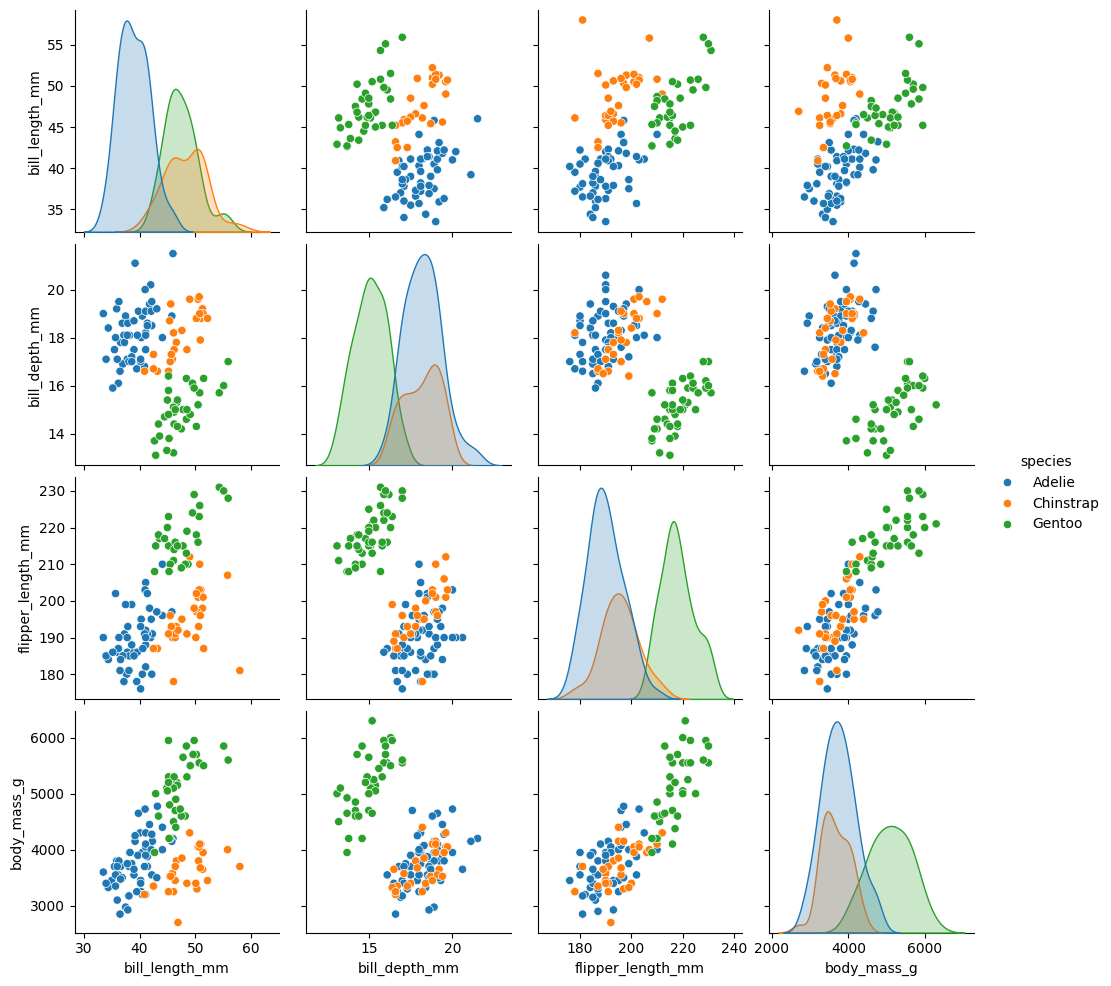

In [ ]:
sns.pairplot(penguins, hue='species')

In [ ]:
print("Adelie: ",penguinsObv.body_mass_g[penguins.species == 'Adelie'].describe(),'\n')
print("Chinstrap: ",penguinsObv.body_mass_g[penguins.species == 'Chinstrap'].describe(),'\n')
print("Gentoo: ",penguinsObv.body_mass_g[penguins.species == 'Gentoo'].describe())

Adelie:  count      78.000000
mean     3748.717949
std       446.139600
min      2850.000000
25%      3450.000000
50%      3700.000000
75%      4000.000000
max      4775.000000
Name: body_mass_g, dtype: float64 

Chinstrap:  count      38.000000
mean     3665.131579
std       365.928081
min      2700.000000
25%      3400.000000
50%      3650.000000
75%      3950.000000
max      4400.000000
Name: body_mass_g, dtype: float64 

Gentoo:  count      54.000000
mean     5095.370370
std       548.692143
min      3950.000000
25%      4662.500000
50%      5100.000000
75%      5550.000000
max      6300.000000
Name: body_mass_g, dtype: float64


In [ ]:
penguinsObv.loc[penguinsObv.body_mass_g > 4775]

species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
224     NaN  Biscoe            47.6            NaN              215.0   
226  Gentoo  Biscoe            45.4            NaN                NaN   
227  Gentoo  Biscoe            46.7           15.3                NaN   
229  Gentoo  Biscoe            46.8           15.4                NaN   
231  Gentoo  Biscoe             NaN           16.1              216.0   
233  Gentoo  Biscoe            48.4           14.6              213.0   
235     NaN  Biscoe             NaN           15.7              217.0   
237  Gentoo  Biscoe             NaN           15.2              221.0   
239     NaN  Biscoe             NaN           15.1              222.0   
240  Gentoo  Biscoe            50.2           14.3              218.0   
241  Gentoo  Biscoe             NaN            NaN              215.0   
243     NaN  Biscoe            46.3           15.8              215.0   
244  Gentoo  Biscoe            42.9           13.1              215.0   
245  Gentoo  Biscoe            46.1           15.1              215.0   
247  Gentoo  Biscoe            47.8           15.0              215.0   
249  Gentoo  Biscoe             NaN            NaN              220.0   
250  Gentoo  Biscoe             NaN           15.3              222.0   
257     NaN  Biscoe            44.4            NaN              219.0   
261  Gentoo  Biscoe            49.6           16.0                NaN   
264  Gentoo  Biscoe             NaN           15.9              222.0   
267     NaN  Biscoe            50.5           15.9                NaN   
268  Gentoo  Biscoe            44.9           13.3                NaN   
269  Gentoo  Biscoe            45.2           15.8              215.0   
270  Gentoo  Biscoe             NaN           14.2              210.0   
271  Gentoo  Biscoe            48.5            NaN                NaN   
273  Gentoo  Biscoe             NaN           15.0              225.0   
274  Gentoo  Biscoe            46.5            NaN                NaN   
275  Gentoo  Biscoe            45.0           15.4              220.0   
277  Gentoo  Biscoe             NaN           15.0              220.0   
279     NaN  Biscoe            50.4           15.3                NaN   
281  Gentoo  Biscoe            46.2           14.9                NaN   
289  Gentoo  Biscoe            50.7            NaN              223.0   
293  Gentoo  Biscoe             NaN           14.8              217.0   
297  Gentoo  Biscoe             NaN           16.3              220.0   
299  Gentoo  Biscoe            45.2           16.4              223.0   
301  Gentoo  Biscoe             NaN           15.6                NaN   
305     NaN  Biscoe            50.8            NaN              228.0   
307     NaN  Biscoe            51.3           14.2              218.0   
308     NaN  Biscoe             NaN           14.0              212.0   
309  Gentoo  Biscoe             NaN           17.0              230.0   
311     NaN  Biscoe            52.2           17.1              228.0   
321  Gentoo  Biscoe            55.9           17.0              228.0   
322     NaN  Biscoe            47.2           15.5              215.0   
323  Gentoo  Biscoe            49.1            NaN                NaN   
325     NaN  Biscoe            46.8           16.1              215.0   
331  Gentoo  Biscoe            49.8           15.9              229.0   
333  Gentoo  Biscoe            51.5           16.3                NaN   
335  Gentoo  Biscoe            55.1           16.0              230.0   
338  Gentoo  Biscoe             NaN           13.7                NaN   
341     NaN  Biscoe             NaN            NaN                NaN   
342  Gentoo  Biscoe            45.2           14.8                NaN   
343     NaN  Biscoe             NaN            NaN              213.0   

     body_mass_g     sex  
224       5400.0    Male  
226       4800.0  Female  
227       5200.0    Male  
229       5150.0    Male  

In [ ]:
penguinsObv.loc[penguinsObv.body_mass_g > 4775, 'species'] = 'Gentoo'

In [ ]:
penguinsObv.loc[penguinsObv.body_mass_g < 2850, 'species'] = 'Chinstrap'

In [ ]:
print("Adelie: ",penguinsObv.flipper_length_mm[penguins.species == 'Adelie'].describe(),'\n')
print("Chinstrap: ",penguinsObv.flipper_length_mm[penguins.species == 'Chinstrap'].describe(),'\n')
print("Gentoo: ",penguinsObv.flipper_length_mm[penguins.species == 'Gentoo'].describe())

Adelie:  count     74.000000
mean     189.972973
std        7.012656
min      176.000000
25%      185.000000
50%      190.000000
75%      195.000000
max      210.000000
Name: flipper_length_mm, dtype: float64 

Chinstrap:  count     38.000000
mean     195.473684
std        7.269845
min      178.000000
25%      191.000000
50%      195.500000
75%      199.750000
max      212.000000
Name: flipper_length_mm, dtype: float64 

Gentoo:  count     55.000000
mean     217.963636
std        6.347830
min      208.000000
25%      214.500000
50%      217.000000
75%      222.000000
max      231.000000
Name: flipper_length_mm, dtype: float64


In [ ]:
penguinsObv.loc[penguinsObv.flipper_length_mm > 212, 'species'] = 'Gentoo'

In [ ]:
print("Adelie: ",penguinsObv.bill_depth_mm[penguins.species == 'Adelie'].describe(),'\n')
print("Chinstrap: ",penguinsObv.bill_depth_mm[penguins.species == 'Chinstrap'].describe(),'\n')
print("Gentoo: ",penguinsObv.bill_depth_mm[penguins.species == 'Gentoo'].describe())

Adelie:  count    73.000000
mean     18.235616
std       1.119818
min      15.900000
25%      17.500000
50%      18.100000
75%      18.900000
max      21.500000
Name: bill_depth_mm, dtype: float64 

Chinstrap:  count    35.000000
mean     18.174286
std       1.057840
min      16.400000
25%      17.300000
50%      18.300000
75%      19.000000
max      19.700000
Name: bill_depth_mm, dtype: float64 

Gentoo:  count    61.000000
mean     15.088525
std       0.980323
min      13.100000
25%      14.300000
50%      15.000000
75%      15.900000
max      17.000000
Name: bill_depth_mm, dtype: float64


In [ ]:
penguinsObv.loc[penguinsObv.bill_depth_mm < 15.9, 'species'] = 'Gentoo'

In [ ]:
print("Adelie: ",penguinsObv.bill_length_mm[penguins.species == 'Adelie'].describe(),'\n')
print("Chinstrap: ",penguinsObv.bill_length_mm[penguins.species == 'Chinstrap'].describe(),'\n')
print("Gentoo: ",penguinsObv.bill_length_mm[penguins.species == 'Gentoo'].describe())

Adelie:  count    73.000000
mean     38.995890
std       2.743752
min      33.500000
25%      36.900000
50%      38.600000
75%      41.100000
max      46.000000
Name: bill_length_mm, dtype: float64 

Chinstrap:  count    37.000000
mean     48.270270
std       3.695934
min      40.900000
25%      45.700000
50%      48.500000
75%      50.800000
max      58.000000
Name: bill_length_mm, dtype: float64 

Gentoo:  count    48.000000
mean     47.458333
std       3.009547
min      42.600000
25%      45.275000
50%      46.800000
75%      49.100000
max      55.900000
Name: bill_length_mm, dtype: float64


In [ ]:
penguinsObv.loc[penguinsObv.bill_length_mm > 55.9, 'species'] = 'Chinstrap'

In [ ]:
penguinsObv.loc[penguinsObv.bill_length_mm < 40.9, 'species'] = 'Adelie'

## Analisando base após imputação

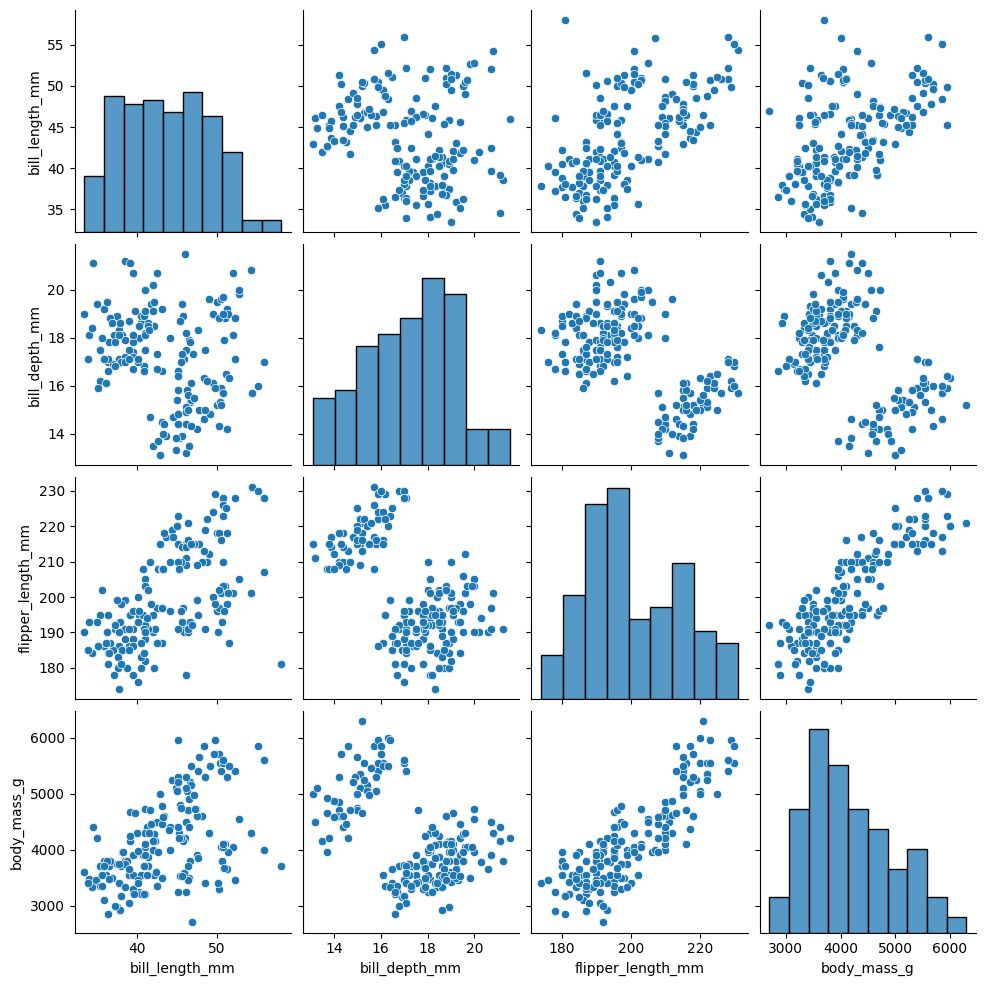

In [ ]:
sns.pairplot(penguinsObv)

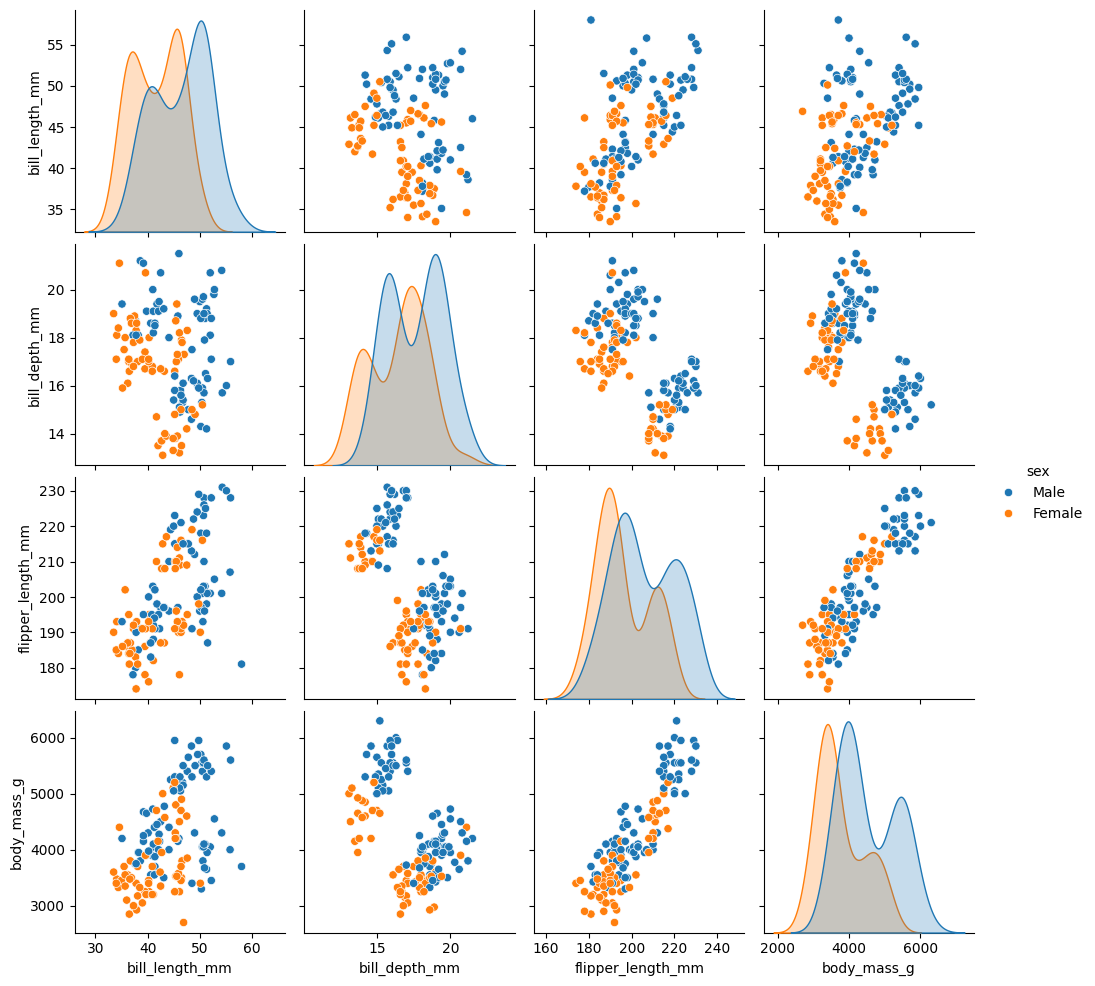

In [ ]:
sns.pairplot(penguinsObv, hue='sex')

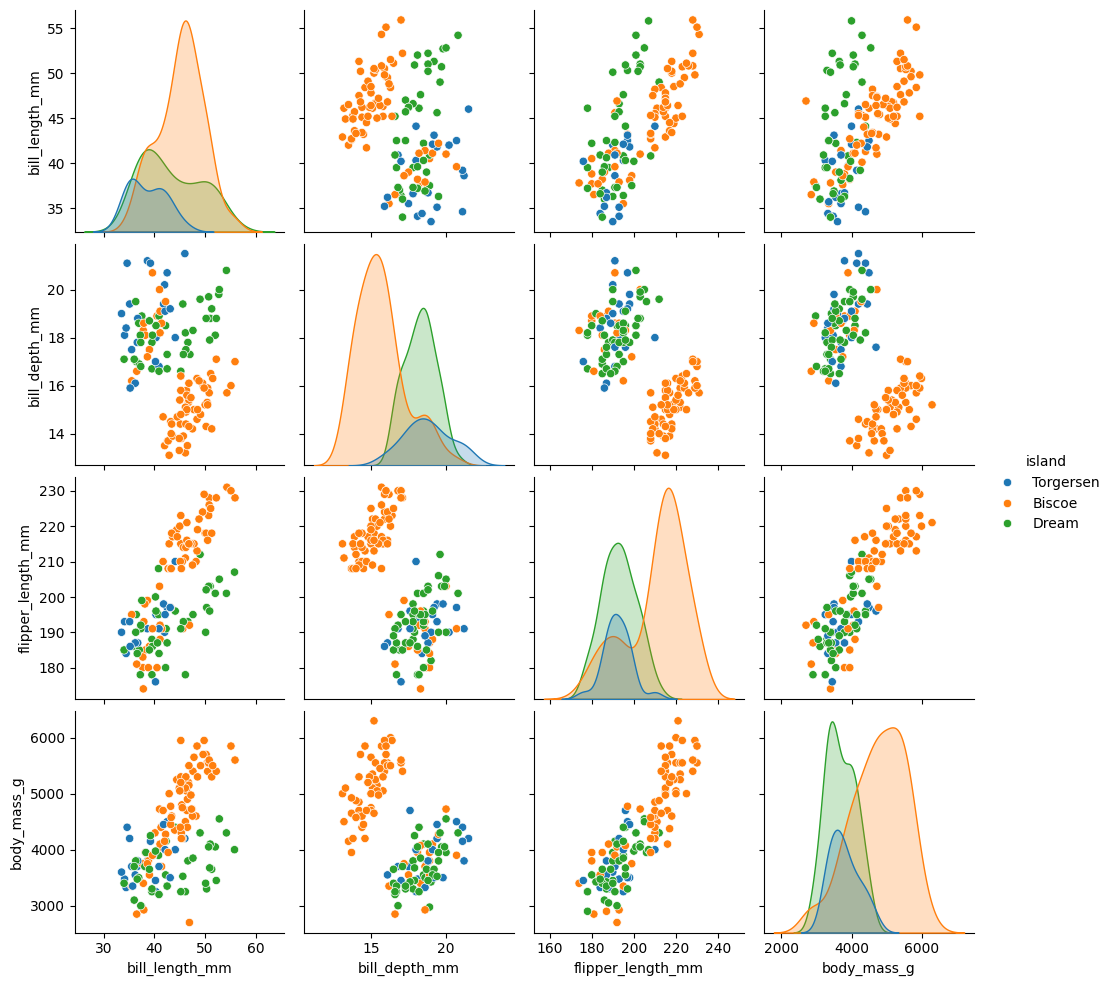

In [ ]:
sns.pairplot(penguinsObv, hue='island')

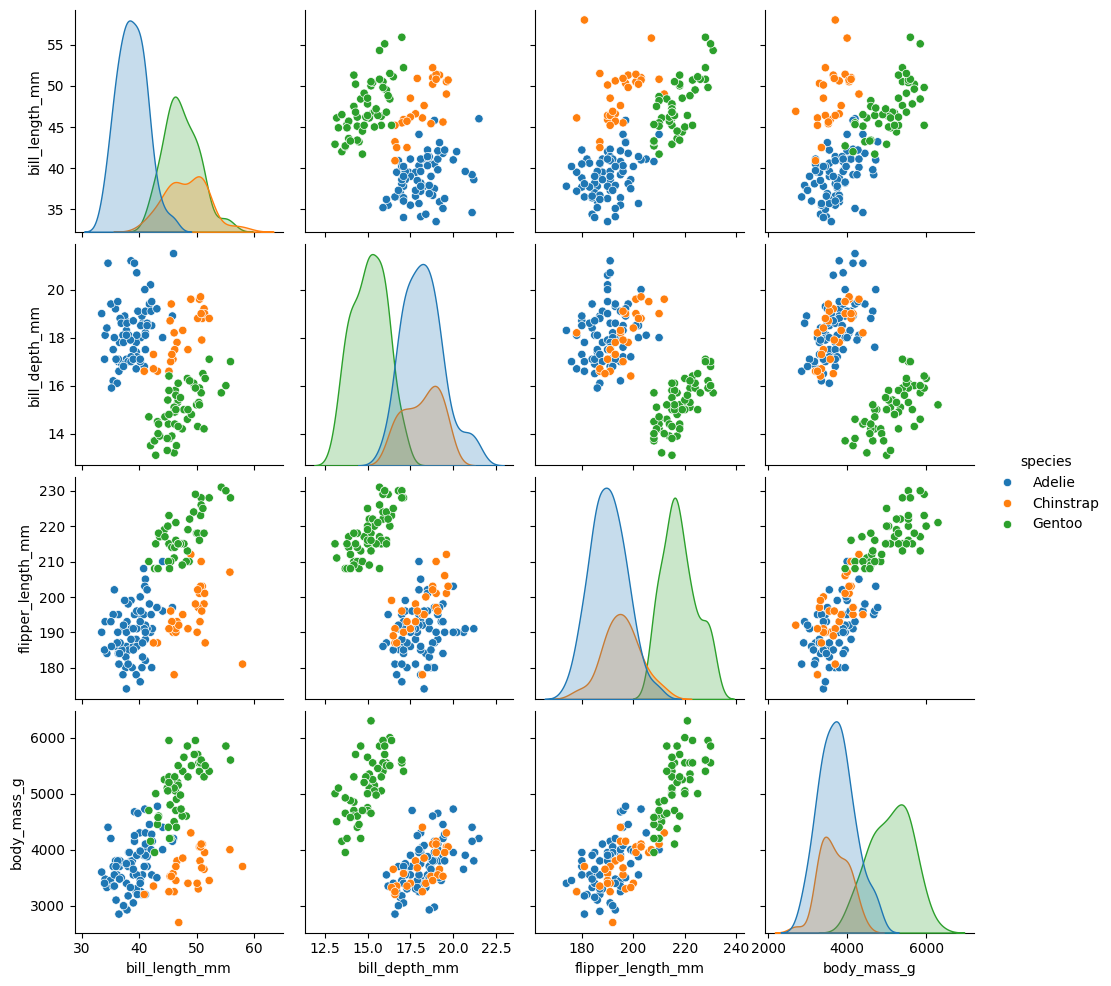

In [ ]:
sns.pairplot(penguinsObv, hue='species')

In [ ]:
penguinsObv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            293 non-null    object 
 1   island             273 non-null    object 
 2   bill_length_mm     233 non-null    float64
 3   bill_depth_mm      244 non-null    float64
 4   flipper_length_mm  247 non-null    float64
 5   body_mass_g        240 non-null    float64
 6   sex                272 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


## Imputando por evidência empírica (Island and Species)

<Axes: xlabel='species', ylabel='island'>

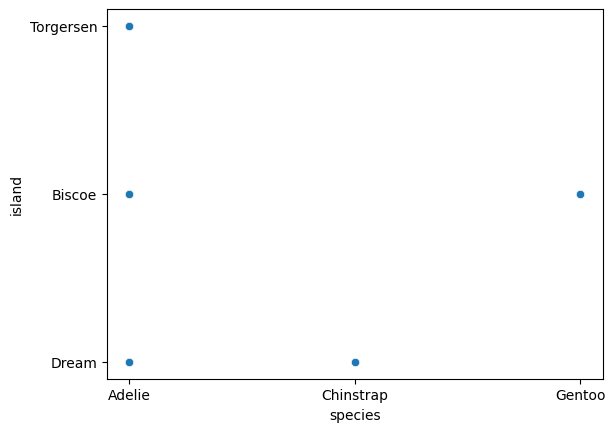

In [ ]:
sns.scatterplot(x=penguins['species'], y=penguins['island'], data=penguins)

Podemos assumir a partir do gráfico observado que:
- a espécie Gentoo esta completamente localizada na ilha Biscoe
- a espécie Chinstrap está totalmente localizada na ilha Dream
- a ilha Torgersen só contem indivíduos da espécie Adelie


In [ ]:
penguinsEmp = penguinsObv.copy()

In [ ]:
mask = penguinsEmp.species == "Gentoo"
penguinsEmp.loc[mask, 'island'] = 'Biscoe'

In [ ]:
mask = penguinsEmp.species == "Chinstrap"
penguinsEmp.loc[mask, 'island'] = 'Dream'

In [ ]:
mask = penguinsEmp.island == "Torgersen"
penguinsEmp.loc[mask, 'species'] = 'Adelie'

## Analisando base após imputação

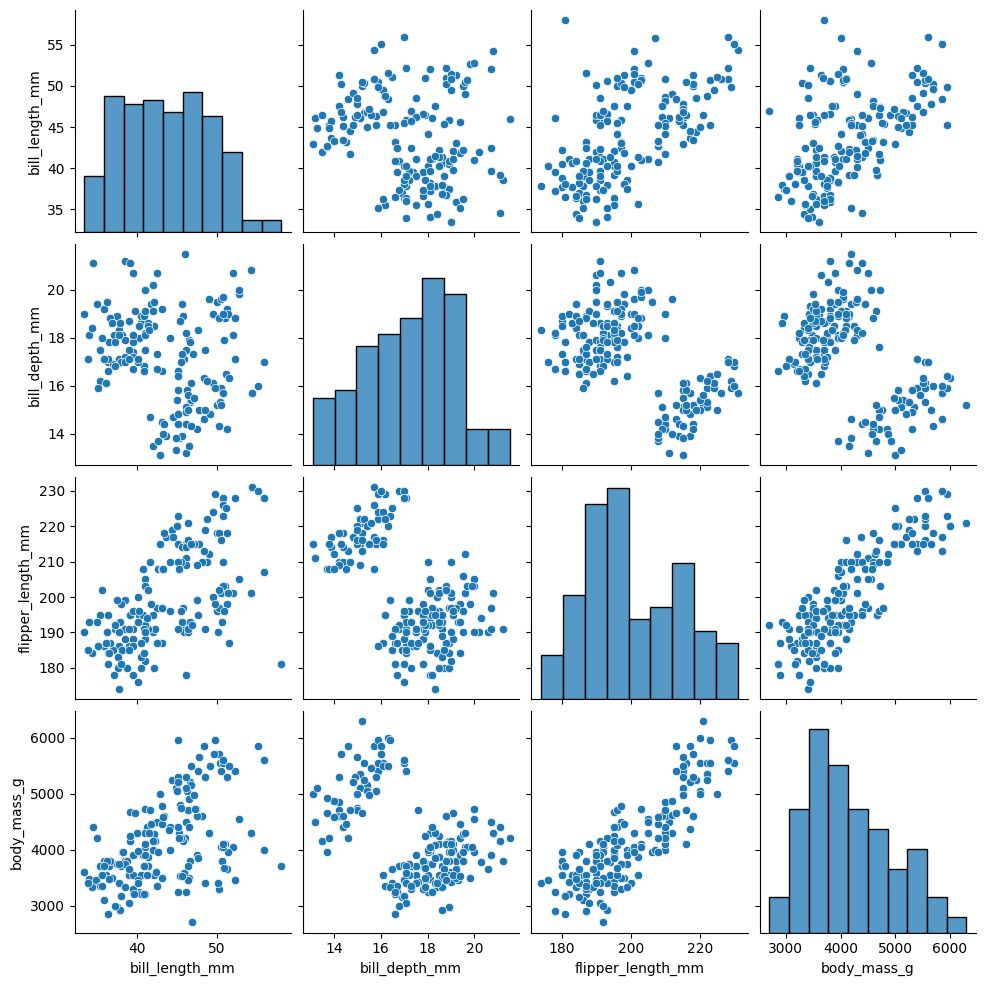

In [ ]:
sns.pairplot(penguinsEmp)

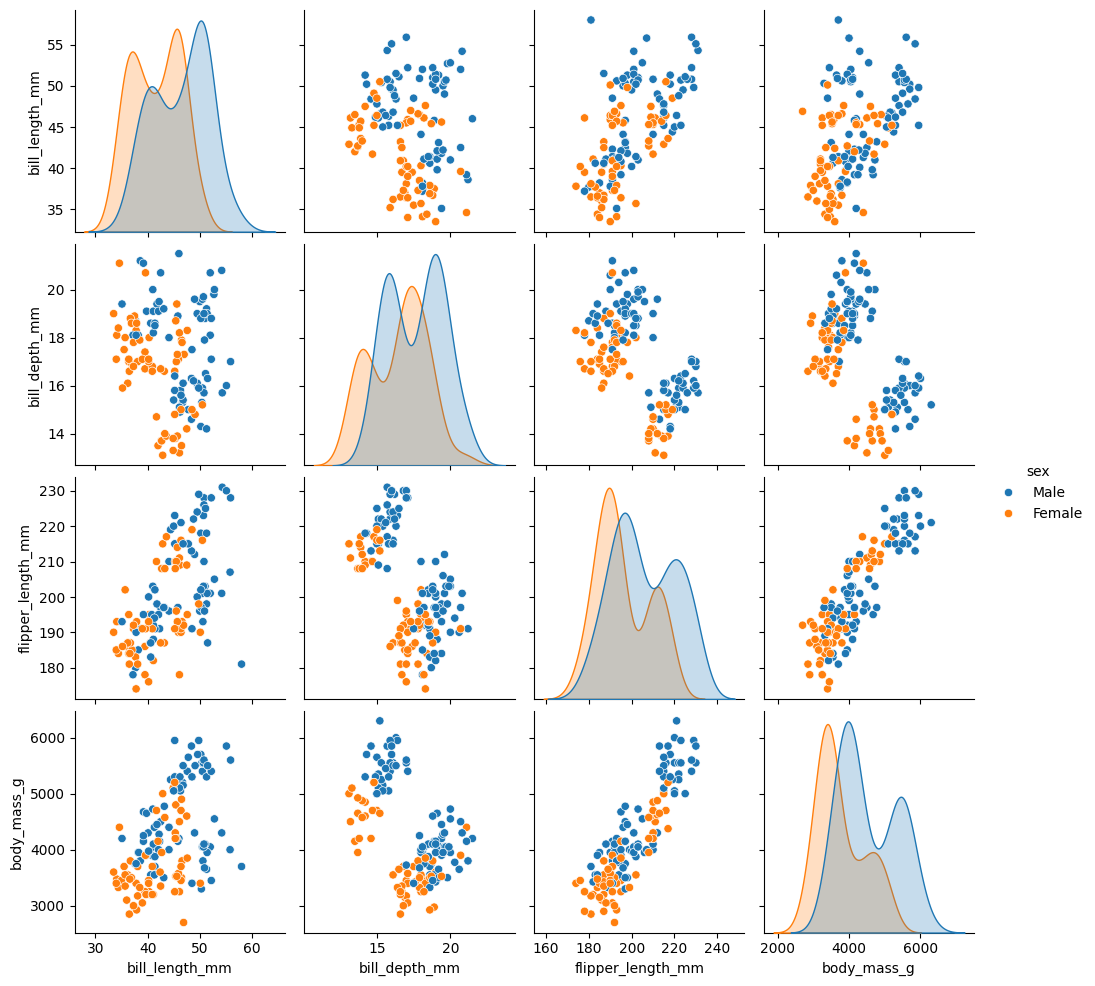

In [ ]:
sns.pairplot(penguinsEmp, hue='sex')

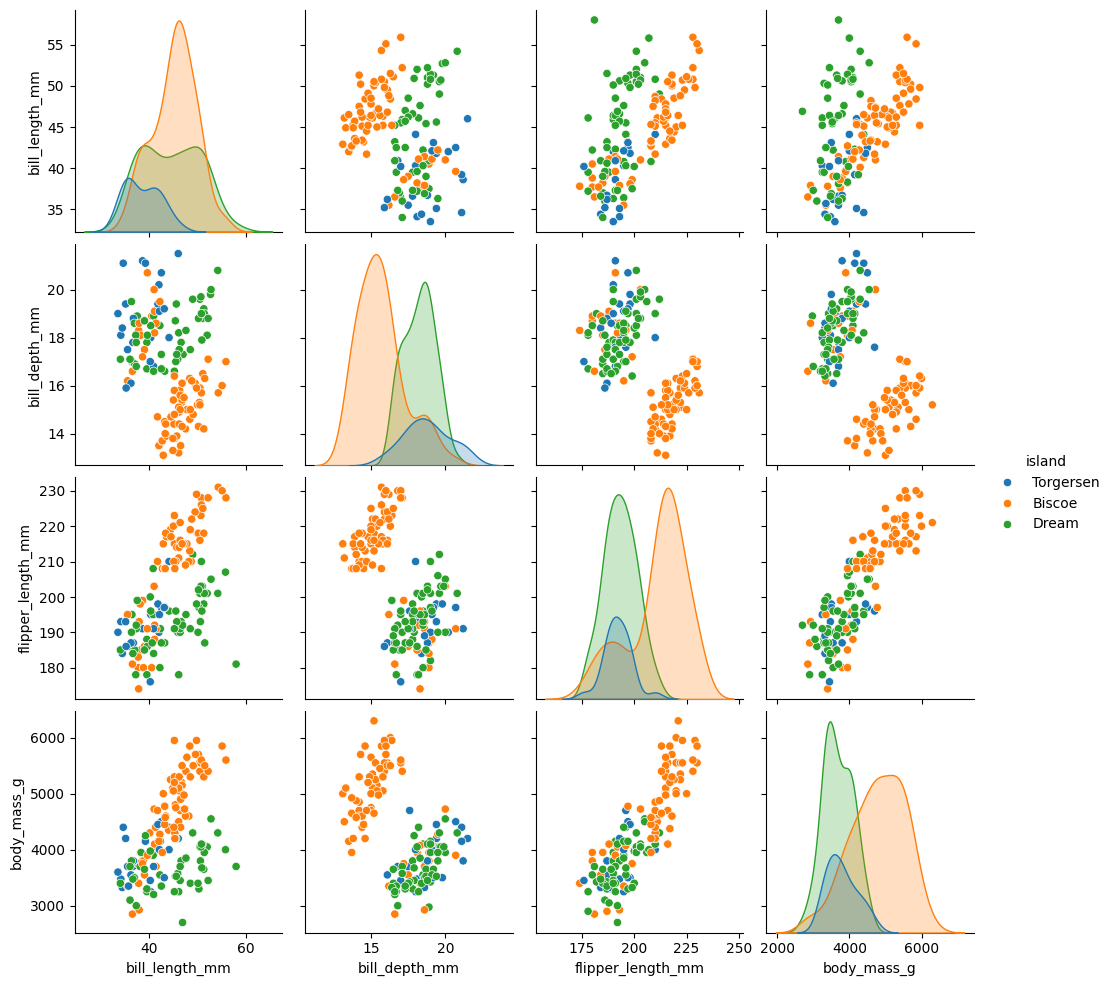

In [ ]:
sns.pairplot(penguinsEmp, hue='island')

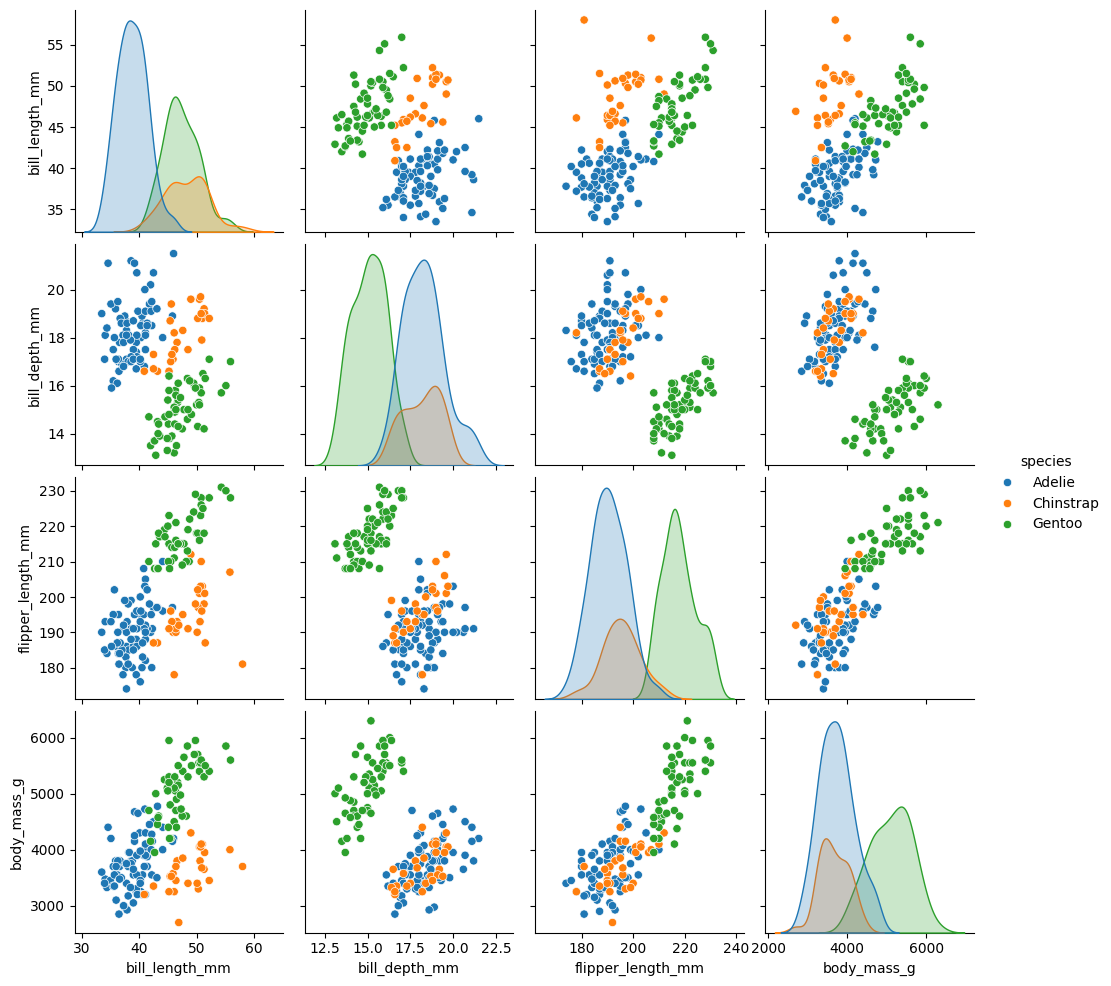

In [ ]:
sns.pairplot(penguinsEmp, hue='species')

In [ ]:
penguinsEmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            298 non-null    object 
 1   island             293 non-null    object 
 2   bill_length_mm     233 non-null    float64
 3   bill_depth_mm      244 non-null    float64
 4   flipper_length_mm  247 non-null    float64
 5   body_mass_g        240 non-null    float64
 6   sex                272 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


Tudo parece normal e conseguimos imputar dados interessantes

Próximos passos?
- eu poderia imputar os numéricos usando KNNImputer e depois usar KNNClassifier para imputar os categóricos (usar analise de desempenho/k para escolher o melhor cenário possivel)
- eu poderia usar HistGradientBoostingClassifier para imputar categóricos e depois imputar numéricos

A partir da base com dados empiricos inputados vou começar a imputar usando estratégias menos confiaveis

# Imputando Dados Numéricos

In [ ]:
penguinsNum = penguinsEmp.copy()

In [ ]:
colunasNum = list(penguinsEmp.columns)
colunasNum.remove('species')
colunasNum.remove('island')
colunasNum.remove('sex')
colunasNum

['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

In [ ]:
scaler = MinMaxScaler()
scaler.fit(penguinsNum[colunasNum])
penguinsNum = scaler.transform(penguinsNum[colunasNum])

In [ ]:
penguinsNum = pd.DataFrame(penguinsNum, columns=colunasNum)
penguinsNum

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0               NaN       0.666667                NaN     0.291667
1          0.244898       0.511905           0.210526          NaN
2          0.277551       0.583333           0.368421     0.152778
3               NaN            NaN                NaN          NaN
4               NaN       0.738095           0.333333     0.208333
..              ...            ...                ...          ...
339             NaN            NaN                NaN          NaN
340        0.542857       0.142857           0.719298          NaN
341             NaN            NaN                NaN     0.847222
342        0.477551       0.202381                NaN     0.694444
343             NaN            NaN           0.684211     0.750000

[344 rows x 4 columns]

In [ ]:
imputer = KNNImputer(n_neighbors=3, weights='distance', copy=True)

imputer.fit(penguinsNum[colunasNum])

#Alterando os nans
penguinsNum[colunasNum] = imputer.transform(penguinsNum[colunasNum])

penguinsNum

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0          0.169388       0.666667           0.105263     0.291667
1          0.244898       0.511905           0.210526     0.284722
2          0.277551       0.583333           0.368421     0.152778
3          0.416169       0.483119           0.466297     0.409317
4          0.061225       0.738095           0.333333     0.208333
..              ...            ...                ...          ...
339        0.416169       0.483119           0.466297     0.409317
340        0.542857       0.142857           0.719298     0.638889
341        0.711837       0.257143           0.820175     0.847222
342        0.477551       0.202381           0.754386     0.694444
343        0.693878       0.333333           0.684211     0.750000

[344 rows x 4 columns]

In [ ]:
penguinsNum = scaler.inverse_transform(penguinsNum[colunasNum])

In [ ]:
penguinsNum = pd.DataFrame(penguinsNum, columns=colunasNum)
penguinsNum

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0         37.650000      18.700000         180.000000  3750.000000
1         39.500000      17.400000         186.000000  3725.000000
2         40.300000      18.000000         195.000000  3250.000000
3         43.696137      17.158197         200.578947  4173.541667
4         35.000011      19.300000         193.000000  3450.000000
..              ...            ...                ...          ...
339       43.696137      17.158197         200.578947  4173.541667
340       46.800000      14.300000         215.000000  5000.000000
341       50.940000      15.260000         220.750000  5750.000000
342       45.200000      14.800000         216.999989  5200.000000
343       50.500000      15.900000         213.000000  5400.000000

[344 rows x 4 columns]

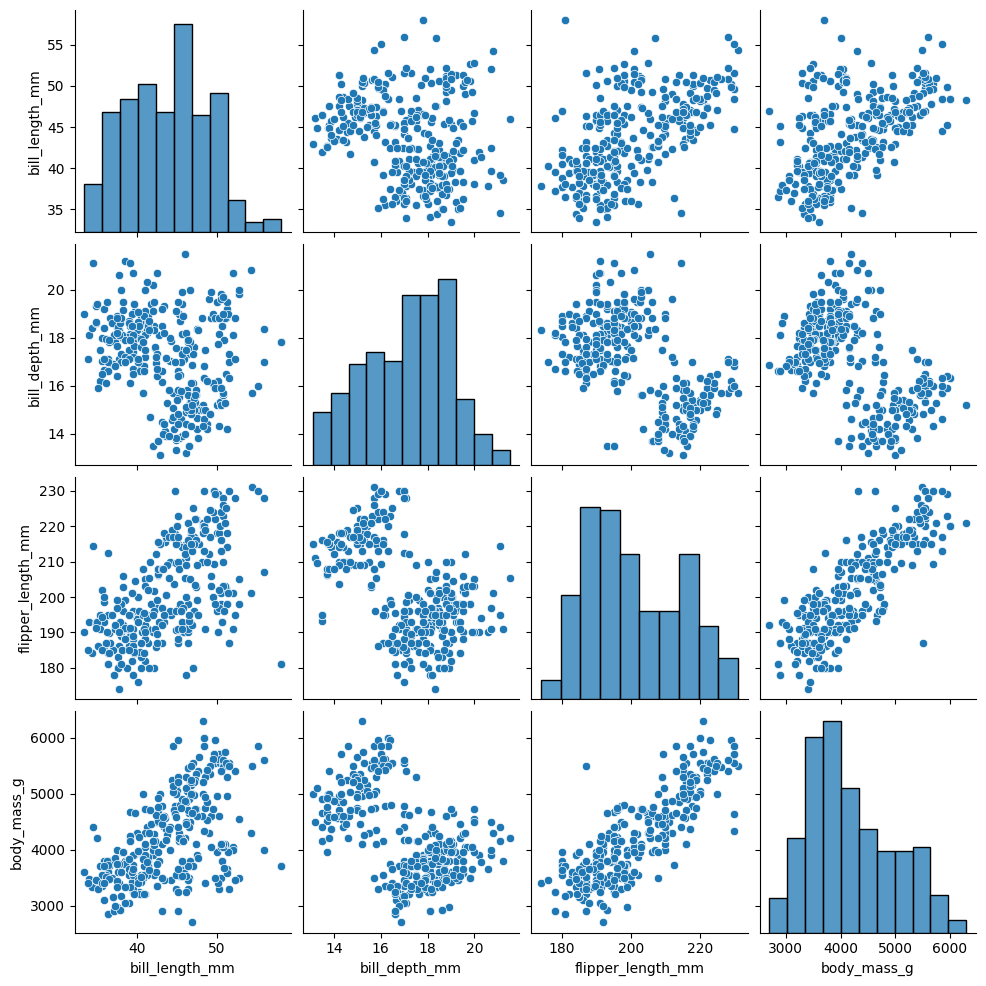

In [ ]:
sns.pairplot(penguinsNum)

# Imputando Categóricos - Usando Regressão logística


In [ ]:
penguinsCat = penguinsNum.copy()

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [ ]:
penguinsCat['species'] = penguinsEmp['species']
penguinsCat['island'] = penguinsEmp['island']
penguinsCat['sex'] = penguinsEmp['sex']

In [ ]:
# Selecionar colunas relevantes
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Separar os dados
df_treino = penguinsCat[penguinsCat['sex'].notna()].copy()
df_imputar = penguinsCat[penguinsCat['sex'].isna()].copy()

In [ ]:
# Codificar a variável alvo (sex)
le = LabelEncoder()
y_train = le.fit_transform(df_treino['sex'])

# Treinar modelo
X_train = df_treino[features].values
modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train, y_train)

# Prever e substituir os valores faltantes
X_missing = df_imputar[features].values
y_pred = modelo.predict(X_missing)
penguinsCat.loc[penguinsCat['sex'].isna(), 'sex'] = le.inverse_transform(y_pred)

# Verificar se a imputação foi concluída
print(penguinsCat['sex'].isna().sum())  # deve imprimir 0
print(penguinsCat.head(10))

0
   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g species  \
0       37.650000      18.700000         180.000000  3750.000000  Adelie   
1       39.500000      17.400000         186.000000  3725.000000  Adelie   
2       40.300000      18.000000         195.000000  3250.000000  Adelie   
3       43.696137      17.158197         200.578947  4173.541667  Adelie   
4       35.000011      19.300000         193.000000  3450.000000  Adelie   
5       37.800012      20.600000         190.000000  3650.000000  Adelie   
6       58.000000      17.800000         181.000000  3700.000000  Adelie   
7       39.200000      18.131368         195.000000  4675.000000  Adelie   
8       34.100000      18.100000         193.000000  3475.000000  Adelie   
9       42.000000      20.200000         190.000000  3905.998884  Adelie   

      island     sex  
0  Torgersen    Male  
1        NaN  Female  
2  Torgersen  Female  
3        NaN    Male  
4        NaN    Male  
5        NaN    Male  


In [ ]:
modelo.predict_proba(X_missing)

array([[0.48922615, 0.51077385],
       [0.47655125, 0.52344875],
       [0.07463839, 0.92536161],
       [0.84513364, 0.15486636],
       [0.77182304, 0.22817696],
       [0.72339053, 0.27660947],
       [0.29039732, 0.70960268],
       [0.63507143, 0.36492857],
       [0.33070864, 0.66929136],
       [0.29043874, 0.70956126],
       [0.86427517, 0.13572483],
       [0.50054842, 0.49945158],
       [0.61518543, 0.38481457],
       [0.37784281, 0.62215719],
       [0.78060583, 0.21939417],
       [0.83642629, 0.16357371],
       [0.50454273, 0.49545727],
       [0.9730056 , 0.0269944 ],
       [0.85128297, 0.14871703],
       [0.19471157, 0.80528843],
       [0.12772447, 0.87227553],
       [0.23293538, 0.76706462],
       [0.20089305, 0.79910695],
       [0.67562958, 0.32437042],
       [0.89136417, 0.10863583],
       [0.9636142 , 0.0363858 ],
       [0.18973261, 0.81026739],
       [0.77506707, 0.22493293],
       [0.46259687, 0.53740313],
       [0.62891537, 0.37108463],
       [0.

In [ ]:
print(penguinsCat['sex'].isna().sum())

0


In [ ]:
penguinsCat['sex'].describe()

count        344
unique         2
top       Female
freq         174
Name: sex, dtype: object

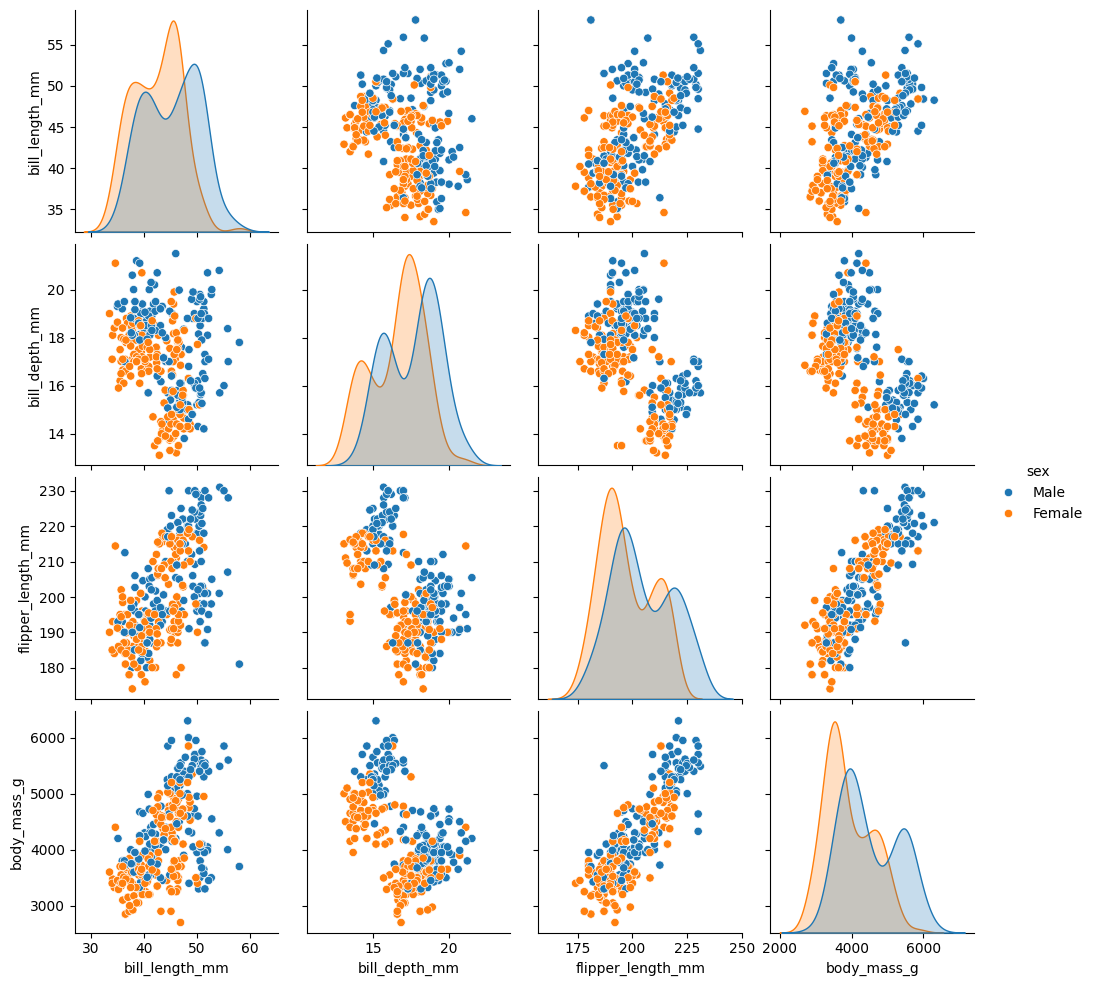

In [ ]:
sns.pairplot(penguinsCat, hue='sex')

In [ ]:
penguinsCat

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g species  \
0         37.650000      18.700000         180.000000  3750.000000  Adelie   
1         39.500000      17.400000         186.000000  3725.000000  Adelie   
2         40.300000      18.000000         195.000000  3250.000000  Adelie   
3         43.696137      17.158197         200.578947  4173.541667  Adelie   
4         35.000011      19.300000         193.000000  3450.000000  Adelie   
..              ...            ...                ...          ...     ...   
339       43.696137      17.158197         200.578947  4173.541667  Gentoo   
340       46.800000      14.300000         215.000000  5000.000000  Gentoo   
341       50.940000      15.260000         220.750000  5750.000000  Gentoo   
342       45.200000      14.800000         216.999989  5200.000000  Gentoo   
343       50.500000      15.900000         213.000000  5400.000000  Gentoo   

        island     sex  
0    Torgersen    Male  
1          NaN  Female  
2    Torgersen  Female  
3          NaN    Male  
4          NaN    Male  
..         ...     ...  
339     Biscoe    Male  
340     Biscoe  Female  
341     Biscoe    Male  
342     Biscoe  Female  
343     Biscoe    Male  

[344 rows x 7 columns]

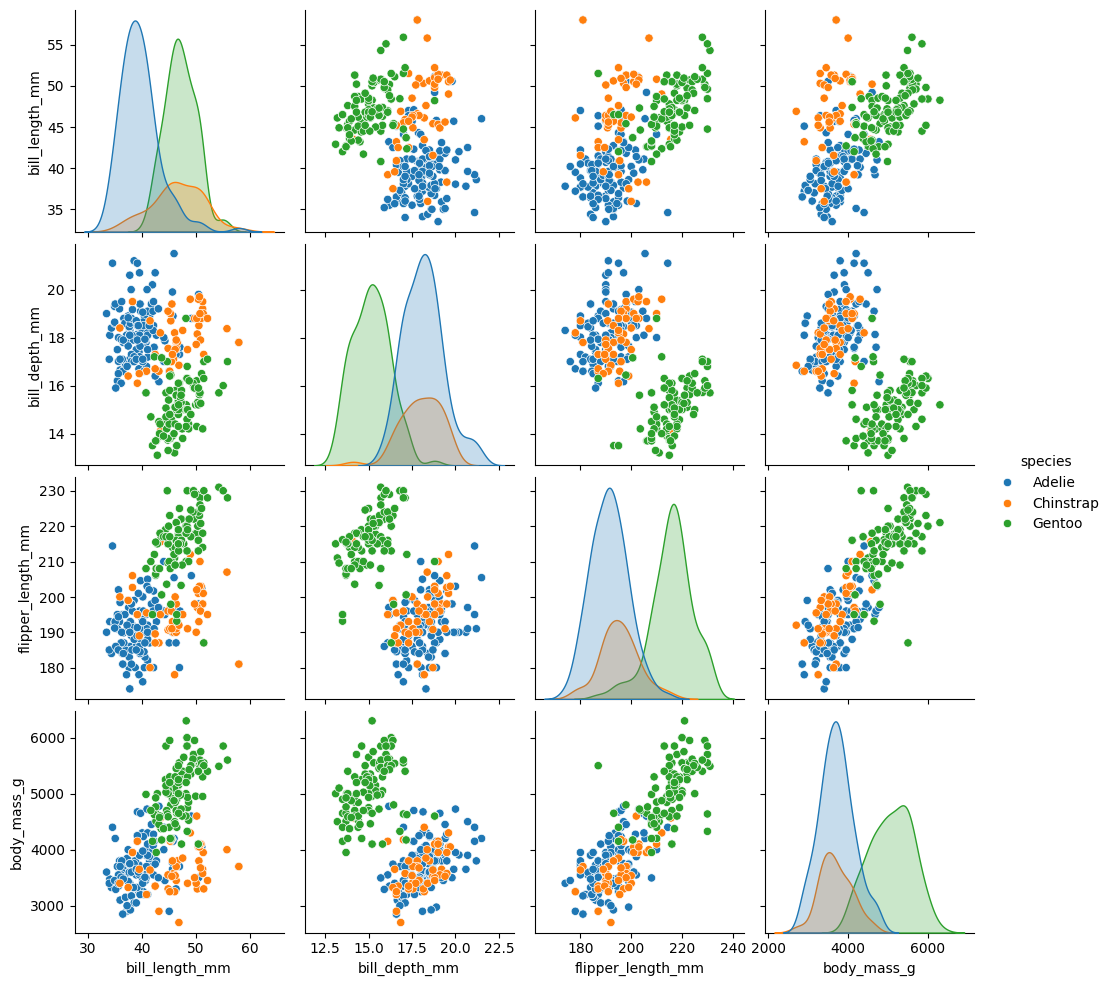

In [ ]:
sns.pairplot(penguinsCat, hue='species')

# Imputação com knn nos categoricos

In [ ]:
penguinsKNN = penguinsCat.copy()

In [ ]:
cat_variables = penguinsKNN[['island', 'species', 'sex']]
cat_dummies = pd.get_dummies(cat_variables, dtype=int, drop_first=False, dummy_na=True)
cat_dummies.head()

island_Biscoe  island_Dream  island_Torgersen  island_nan  species_Adelie  \
0              0             0                 1           0               1   
1              0             0                 0           1               1   
2              0             0                 1           0               1   
3              0             0                 0           1               1   
4              0             0                 0           1               1   

   species_Chinstrap  species_Gentoo  species_nan  sex_Female  sex_Male  \
0                  0               0            0           0         1   
1                  0               0            0           1         0   
2                  0               0            0           1         0   
3                  0               0            0           0         1   
4                  0               0            0           0         1   

   sex_nan  
0        0  
1        0  
2        0  
3        0  
4        0

In [ ]:
for i in range(len(penguinsKNN)):
  if cat_dummies['species_nan'].tolist()[i] == 1:
    cat_dummies['species_Adelie'][i] = np.nan
    cat_dummies['species_Chinstrap'][i] = np.nan
    cat_dummies['species_Gentoo'][i] = np.nan
  if cat_dummies['island_nan'].tolist()[i] == 1:
    cat_dummies['island_Biscoe'][i] = np.nan
    cat_dummies['island_Dream'][i] = np.nan
    cat_dummies['island_Torgersen'][i] = np.nan



<ipython-input-138-797d4b0c062b>:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cat_dummies['island_Biscoe'][i] = np.nan
<ipython-input-138-797d4b0c062b>:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You ar

In [ ]:
cat_dummies = cat_dummies.drop(['island_nan', 'species_nan', 'sex_nan'], axis=1)

In [ ]:
penguinsKNN = pd.concat([penguinsKNN, cat_dummies], axis=1)

In [ ]:
penguinsKNN = penguinsKNN.drop(['species', 'island', 'sex'], axis=1)

In [ ]:
colunas = penguinsKNN.columns

In [ ]:
scaler = MinMaxScaler()
scaler.fit(penguinsKNN)
penguinsKNN = scaler.transform(penguinsKNN)

In [ ]:
penguinsKNN = pd.DataFrame(penguinsKNN, columns=colunas)
penguinsKNN

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
0          0.169388       0.666667           0.105263     0.291667   
1          0.244898       0.511905           0.210526     0.284722   
2          0.277551       0.583333           0.368421     0.152778   
3          0.416169       0.483119           0.466297     0.409317   
4          0.061225       0.738095           0.333333     0.208333   
..              ...            ...                ...          ...   
339        0.416169       0.483119           0.466297     0.409317   
340        0.542857       0.142857           0.719298     0.638889   
341        0.711837       0.257143           0.820175     0.847222   
342        0.477551       0.202381           0.754386     0.694444   
343        0.693878       0.333333           0.684211     0.750000   

     island_Biscoe  island_Dream  island_Torgersen  species_Adelie  \
0              0.0           0.0               1.0             1.0   
1              NaN           NaN               NaN             1.0   
2              0.0           0.0               1.0             1.0   
3              NaN           NaN               NaN             1.0   
4              NaN           NaN               NaN             1.0   
..             ...           ...               ...             ...   
339            1.0           0.0               0.0             0.0   
340            1.0           0.0               0.0             0.0   
341            1.0           0.0               0.0             0.0   
342            1.0           0.0               0.0             0.0   
343            1.0           0.0               0.0             0.0   

     species_Chinstrap  species_Gentoo  sex_Female  sex_Male  
0                  0.0             0.0         0.0       1.0  
1                  0.0             0.0         1.0       0.0  
2                  0.0             0.0         1.0       0.0  
3                  0.0             0.0         0.0       1.0  
4                  0.0             0.0         0.0       1.0  
..                 ...             ...         ...       ...  
339                0.0             1.0         0.0       1.0  
340                0.0             1.0         1.0       0.0  
341                0.0             1.0         0.0       1.0  
342                0.0             1.0         1.0       0.0  
343                0.0             1.0         0.0       1.0  

[344 rows x 12 columns]

In [ ]:
imputerKNN = KNNImputer(n_neighbors=5, weights='distance', copy=True)
imputerKNN.fit(penguinsKNN)
penguinsKNN = imputerKNN.transform(penguinsKNN)

In [ ]:
for i in range(len(penguinsKNN)):
  if penguinsKNN[i, 4] > penguinsKNN[i, 5] and penguinsKNN[i,4] > penguinsKNN[i, 6]:
    penguinsKNN[i, 4] = 1  # Round island_Torgersen
    penguinsKNN[i, 5] = 0  # Round island_Dream
    penguinsKNN[i, 6] = 0  # Round island_Biscoe
  if penguinsKNN[i, 5] > penguinsKNN[i,4] and penguinsKNN[i,5] > penguinsKNN[i, 6]:
    penguinsKNN[i, 4] = 0  # Round island_Torgersen
    penguinsKNN[i, 5] = 1  # Round island_Dream
    penguinsKNN[i, 6] = 0  # Round island_Biscoe
  if penguinsKNN[i, 6] > penguinsKNN[i,4] and penguinsKNN[i,6] > penguinsKNN[i, 5]:
    penguinsKNN[i, 4] = 0  # Round island_Torgersen
    penguinsKNN[i, 5] = 0  # Round island_Dream
    penguinsKNN[i, 6] = 1  # Round island_Biscoe
  if penguinsKNN[i,7] > penguinsKNN[i, 8] and penguinsKNN[i,7] > penguinsKNN[i, 9]:
    penguinsKNN[i, 7] = 1  # Round island_Torgersen
    penguinsKNN[i, 8] = 0  # Round island_Dream
    penguinsKNN[i, 9] = 0  # Round island_Biscoe
  if penguinsKNN[i, 8] > penguinsKNN[i,7] and penguinsKNN[i,8] > penguinsKNN[i, 9]:
    penguinsKNN[i, 7] = 0  # Round island_Torgersen
    penguinsKNN[i, 8] = 1  # Round island_Dream
    penguinsKNN[i, 9] = 0  # Round island_Biscoe
  if penguinsKNN[i, 9] > penguinsKNN[i,7] and penguinsKNN[i,9] > penguinsKNN[i, 8]:
    penguinsKNN[i, 7] = 0  # Round island_Torgersen
    penguinsKNN[i, 8] = 0  # Round island_Dream
    penguinsKNN[i, 9] = 1  # Round island_Biscoe

penguinsKNN

array([[0.16938776, 0.66666667, 0.10526316, ..., 0.        , 0.        ,
        1.        ],
       [0.24489796, 0.51190476, 0.21052632, ..., 0.        , 1.        ,
        0.        ],
       [0.27755102, 0.58333333, 0.36842105, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.71183673, 0.25714286, 0.82017544, ..., 1.        , 0.        ,
        1.        ],
       [0.47755102, 0.20238095, 0.75438577, ..., 1.        , 1.        ,
        0.        ],
       [0.69387755, 0.33333333, 0.68421053, ..., 1.        , 0.        ,
        1.        ]])

In [ ]:
penguinsKNN = scaler.inverse_transform(penguinsKNN)

In [ ]:
penguinsKNN = pd.DataFrame(penguinsKNN, columns = list(colunas))

In [ ]:
penguinsKNN['species'] = penguinsCat['species']
penguinsKNN['island'] = penguinsCat['island']
penguinsKNN['sex'] = penguinsCat['sex']

In [ ]:
for i in range(len(penguinsKNN)):
  if penguinsKNN['species_Adelie'].tolist()[i] == 1:
    penguinsKNN['species'][i] = 'Adelie'
  if penguinsKNN['species_Chinstrap'].tolist()[i] == 1:
    penguinsKNN['species'][i] = 'Chinstrap'
  if penguinsKNN['species_Gentoo'].tolist()[i] == 1:
    penguinsKNN['species'][i] = 'Gentoo'
  if penguinsKNN['island_Biscoe'].tolist()[i] == 1:
    penguinsKNN['island'][i] = 'Biscoe'
  if penguinsKNN['island_Dream'].tolist()[i] == 1:
    penguinsKNN['island'][i] = 'Dream'
  if penguinsKNN['island_Torgersen'].tolist()[i] == 1:
    penguinsKNN['island'][i] = 'Torgersen'
  if penguinsKNN['sex_Female'].tolist()[i] == 1:
    penguinsKNN['sex'][i] = 'Female'
  if penguinsKNN['sex_Male'].tolist()[i] == 1:
    penguinsKNN['sex'][i] = 'Male'

A saída de streaming foi truncada nas últimas 5000 linhas.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  penguinsKNN['sex'][i] = 'Male'
<ipython-input-150-b332bd1f672c>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguinsKNN['sex'][i] = 'Male'
<ipython-input-150-b332bd1f672c>:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you

In [ ]:
penguinsKNN.drop(['species_Adelie', 'species_Chinstrap', 'species_Gentoo', 'island_Torgersen', 'island_Dream', 'island_Biscoe', 'sex_Female', 'sex_Male'], axis = 1, inplace = True)
penguinsKNN

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g species  \
0         37.650000      18.700000         180.000000  3750.000000  Adelie   
1         39.500000      17.400000         186.000000  3725.000000  Adelie   
2         40.300000      18.000000         195.000000  3250.000000  Adelie   
3         43.696137      17.158197         200.578947  4173.541667  Adelie   
4         35.000011      19.300000         193.000000  3450.000000  Adelie   
..              ...            ...                ...          ...     ...   
339       43.696137      17.158197         200.578947  4173.541667  Gentoo   
340       46.800000      14.300000         215.000000  5000.000000  Gentoo   
341       50.940000      15.260000         220.750000  5750.000000  Gentoo   
342       45.200000      14.800000         216.999989  5200.000000  Gentoo   
343       50.500000      15.900000         213.000000  5400.000000  Gentoo   

        island     sex  
0    Torgersen    Male  
1        Dream  Female  
2    Torgersen  Female  
3        Dream    Male  
4        Dream    Male  
..         ...     ...  
339     Biscoe    Male  
340     Biscoe  Female  
341     Biscoe    Male  
342     Biscoe  Female  
343     Biscoe    Male  

[344 rows x 7 columns]

In [ ]:
penguinsKNN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bill_length_mm     344 non-null    float64
 1   bill_depth_mm      344 non-null    float64
 2   flipper_length_mm  344 non-null    float64
 3   body_mass_g        344 non-null    float64
 4   species            344 non-null    object 
 5   island             344 non-null    object 
 6   sex                344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


## Analise dos dados finais

In [ ]:
penguinsKNN.to_csv("penguins_final.csv", index=False, header=True)

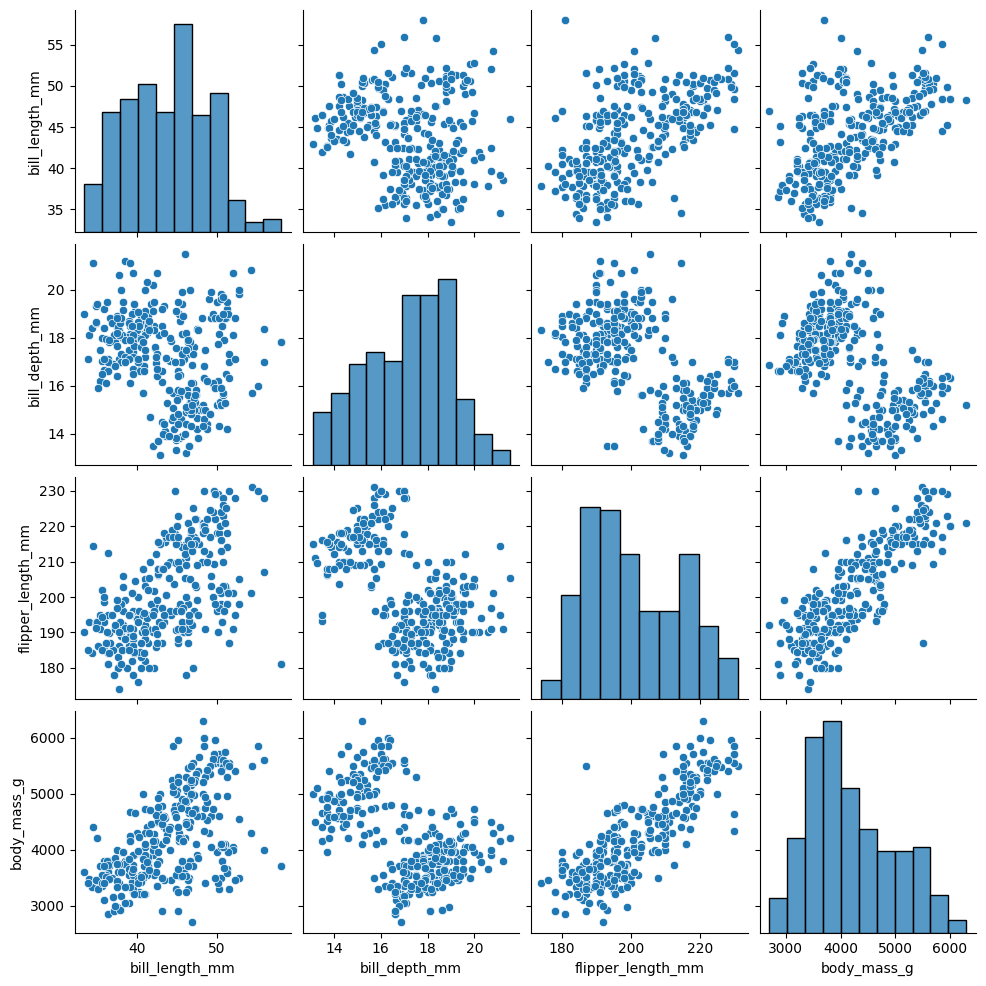

In [ ]:
sns.pairplot(penguinsKNN)

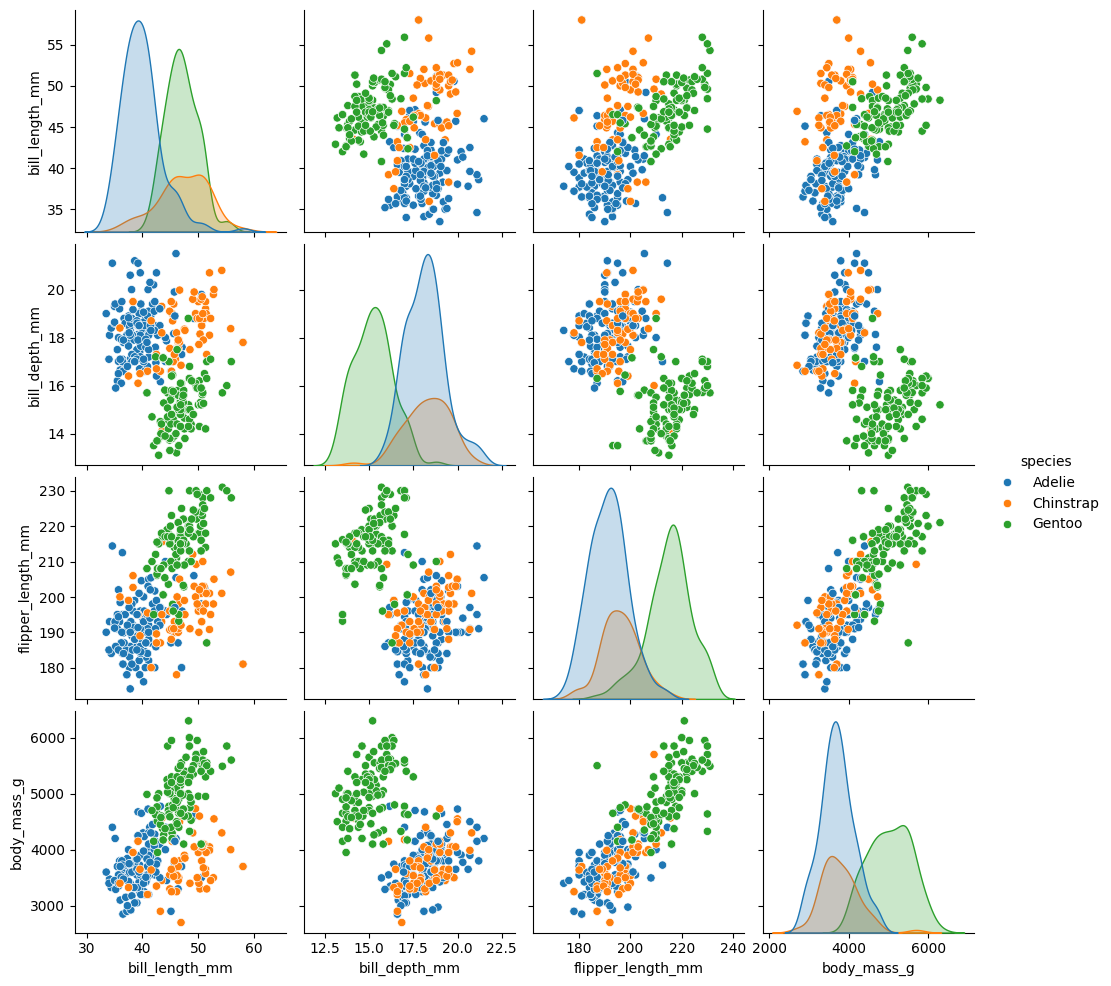

In [ ]:
sns.pairplot(penguinsKNN, hue='species')

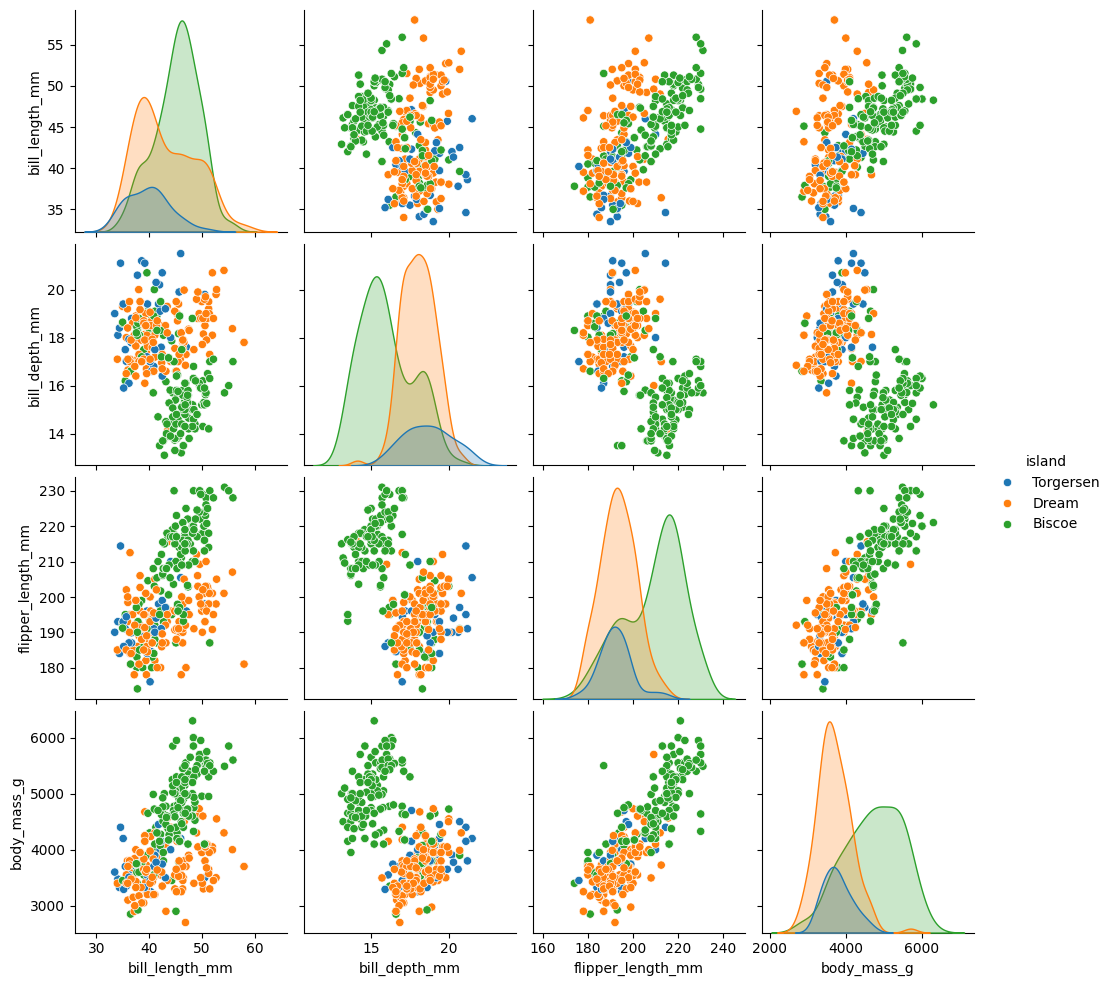

In [ ]:
sns.pairplot(penguinsKNN, hue='island')

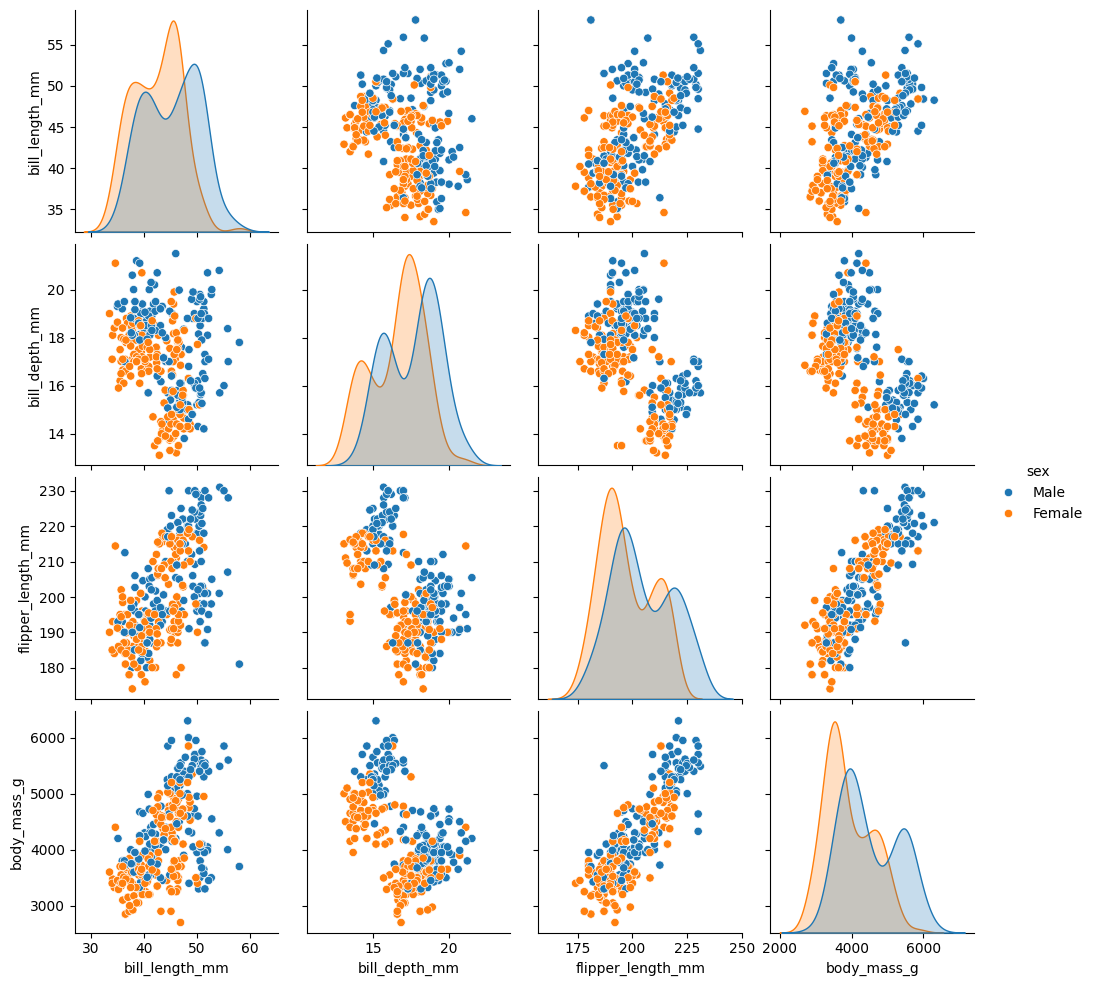

In [ ]:
sns.pairplot(penguinsKNN, hue='sex')